
# Precision Prognosis: Leveraging Indirectly Linked Blood Biomarkers for Early Detection of Diabetes Using Machine Learning Algorithms



## Introduction

The dataset consist of medical information and laboratory analyses of patients from the laboratories of Medical City Hospital and the Specialized Center for Endocrinology and Diabetes at Al-Kindy Teaching Hospital in Iraq.

Employing various supervised learning techniques for classifications, algorithms to be used are: 
1. Logistic Regression
2. KNN
3. Decision Tree

The aim is to develop a binary classification ML model, classifying instances into one of two classes, ultimately predicting the risk of diabetes using various medical information including blood biomarkers.

This dataset was obtained from **[here](https://doi.org/10.17632/wj9rwkp9c2.1)**.<br>
_**disclaimer:** The main dataset initially contained three classes, but the 'P' class was removed. This adjustment was deemed more suitable as there were very little to no information on the class, and the model should predict whether a patient is diabetic or not, which is most important._

_N.B. If you're running this locally, please refer to the requirements.txt file for a comprehensive list of Python libraries utilized in this project, along with their respective versions._


## Importing relevant python libraries


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# fundamental python libraries
import numpy as np
import pandas as pd

# High quality data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for finding big holes in the dataset i.e. rows and columns with a lot of missing values
import missingno as msno

# for machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
# loading the dataset
data = pd.read_csv('Dataset of Diabetes .csv')
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
data.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y



## Data Preparation

To streamline the process of data preparation, a structured approach will be employed, utilizing three investigative processes to gain a deeper understanding of the dataset and explore its details. Structure investigation, quality investigation and preprocessing, and EDA.



### Structure Investigation

A view of the overall structure, shape, and data types of the dataset in terms of its observations and features to have a broad understanding of it.

In [4]:
# shape of the dataset
data.shape
print('There are {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

There are 1000 rows and 14 columns in the dataset.


In [5]:
# getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB



From the information above, the dataset has 12 numerical features and 2 Non-numerical features


#### Descriptiodn of the Most Important Features


**Gender**: Indicates the gender of the patient, which can be a factor in the prediction of diabetes.

**Age**: Represents the age of the patient in years. Age can be a risk factor for diabetes, as the risk of diabetes increases with age.

**Urea (Blood Urea Nitrogen)**: Amount of Urea Nitrogen in the blood which is a waste product that the kidneys remove. Unit not stated but assumed to be in mmol/L, which is the most common international SI unit.

**Cr (Creatinine Ratio)**: A waste product of muscle metabolism that is excreted from the body. _Unit not stated in the dataset description but assumed to be μmol/L._ 

**HbA1c (Haemoglobin A1C / Glycated Haemoglobin)**: Average blood sugar levels over the past 3 months. Typically measured in percentage (%).

**Chol (Cholesterol)**: Cholesterol level in the blood. High amount can be a risk factor for diabetes.

**TG (Triglycerides)**: Represents the level of triglycerides in the blood.

**HDL (High-Density Lipoprotein)**: Is the 'good' cholesterol that helps transport excess cholesterol from body tissues back to the liver for further processing or excretion.

**LDL (Low-Density Lipoprotein)**: Is the 'bad' cholesterol that can cause plaque buildup in the arteries.

**VLDL (Very-low-density lipoprotein)**: A type of cholesterol produced in the liver and released into the bloodstream to supply body tissues with a type of fat (triglycerides).

_Unit for lipids (**Chol** and **TG**) and Lipoproteins (**HDL**, **LDL** and **VLDL**) not stated in the dataset documentation but assumed to be in mmol/L for this project._

**BMI (Body Mass Index)**: determine whether a person is in the normal weight, overweight, or obese category. Measured in Kg/m^2.

**CLASS**: Patients are classified into one of two classes:
1. **Diabetic (Y)**: Patients who have been diagnosed with diabetes.
2. **Non-Diabetic (N)**: Patients who do not have diabetes.



#### Structure of non-numerical features


In [6]:
# Display non-numerical features
data.select_dtypes(exclude='number').head()

,Gender,CLASS
0,F,N
1,M,N
2,F,N
3,F,N
4,M,N


In [7]:
# investigating unique values for each non-numerical feature, the frequency
data.describe(exclude='number')

,Gender,CLASS
count,1000,1000
unique,3,5
top,M,Y
freq,565,840


In [8]:
# Gender contains 3 unique values
data['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [9]:
# Displaying the number of samples for each gender class to find any unwanted entry
data['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [10]:
# Change lowercase 'f' to uppercase.
data.Gender.replace({'f': 'F'}, inplace=True)

# display unique values after change
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [11]:
# display Gender value counts after change
data['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [12]:
# CLASS contains 5 unique values
data['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [13]:
# display value counts for each CLASS value
data['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [14]:
# remove P class, change Y and N classes, remove spaces
data = data[data['CLASS'] != 'P']
data.CLASS.replace({'Y ': 'Y'}, inplace=True)
data.CLASS.replace({'N ': 'N'}, inplace=True)

# display unique values after change
data['CLASS'].unique()

array(['N', 'Y'], dtype=object)

In [15]:
# display CLASS value counts after change
data['CLASS'].value_counts()

CLASS
Y    844
N    103
Name: count, dtype: int64

#### Structure of numerical features

In [16]:
# display numerical features
data.select_dtypes(include='number').head()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,502,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,735,34221,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,420,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,680,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,504,34223,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [17]:
# displaying statistical summary for numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,947.0,337.390707,2.389386e+02,1.0,125.0,295.0,546.5,800.00
No_Pation,947.0,282094.571278,3.473737e+06,123.0,24063.5,34390.0,45369.5,75435657.00
AGE,947.0,54.101373,8.499612e+00,20.0,51.0,55.0,59.0,79.00
Urea,947.0,5.159074,2.975024e+00,0.5,3.7,4.6,5.7,38.90
Cr,947.0,69.103485,6.086296e+01,6.0,48.0,60.0,73.0,800.00
HbA1c,947.0,8.408617,2.544040e+00,0.9,6.8,8.1,10.2,16.00
Chol,947.0,4.878691,1.313356e+00,0.0,4.0,4.8,5.6,10.30
TG,947.0,2.362101,1.417275e+00,0.3,1.5,2.0,2.9,13.80
HDL,947.0,1.209081,6.724234e-01,0.2,0.9,1.1,1.3,9.90
LDL,947.0,2.616304,1.127316e+00,0.3,1.8,2.5,3.3,9.90



_Investigating unique values in each numerical feature. Binary (2 unique values), Ordinal (3 to ~10 unique values) and Continuous (more than 10 unique values)_.


<Axes: title={'center': 'Unique values per feature'}>

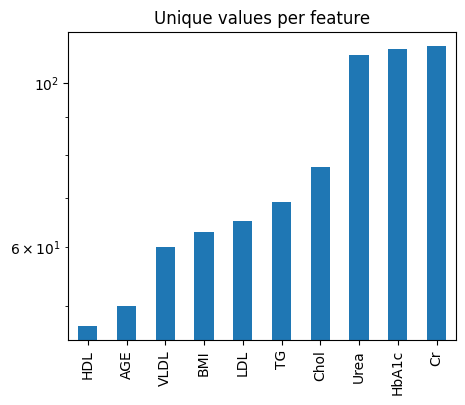

In [18]:
# showing unique entries in each numerical feature
unique_values = data.drop(['ID', 'No_Pation'], axis=1).select_dtypes(include='number').nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(5, 4), title='Unique values per feature')

### Quality Investigation and Data Preprocessing

A global view of the dataset in terms of duplicate entries, missing values, unwanted data and recording errors.


#### Duplicate Entries

In [19]:
# Checking for duplicates(entries representing the same sample points multiple times)
# first we ignore the unique identifiers, ID and No_Pation.
n_duplicates = data.drop(labels=['ID', 'No_Pation'], axis=1).duplicated().sum()
print('There are {} duplicates in the dataset.'.format(n_duplicates))

There are 161 duplicates in the dataset.


In [20]:
# drop duplicate entries, ignore unique identifiers, ID and No_Pation
other_cols = data.drop(labels=['ID', 'No_Pation'], axis=1).columns

data = data.drop_duplicates(subset=other_cols)
data.reset_index()
print('After dropping duplicate entries, there are now {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

After dropping duplicate entries, there are now 786 rows and 14 columns in the dataset.


#### Missing Values

In [21]:
#checking for missing values
data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

<Axes: >

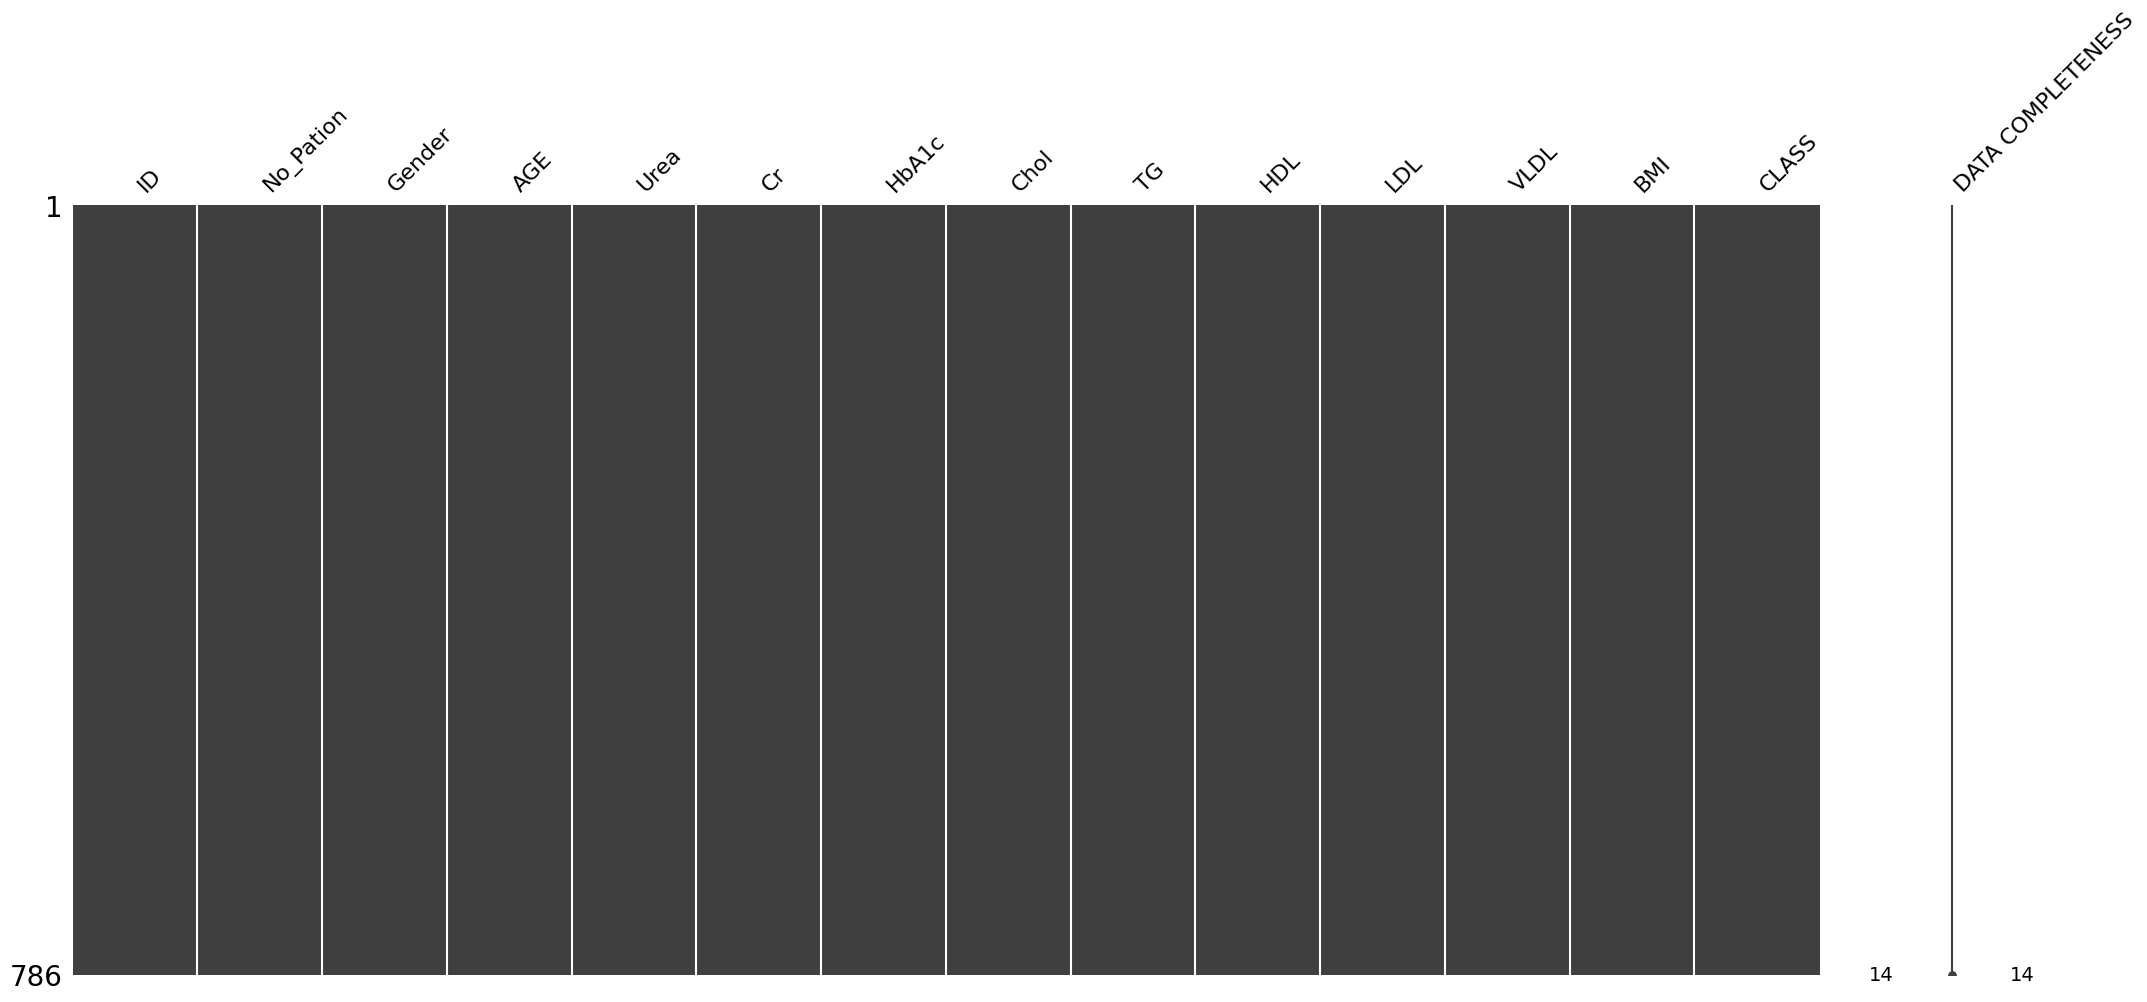

In [22]:
# further checks
msno.matrix(data, labels=True, sort='descending')


There are no missing values hence no big holes.


#### Unwanted Entries and Recording Errors for Numerical Features

Entries that should not be in the dataset at all.

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

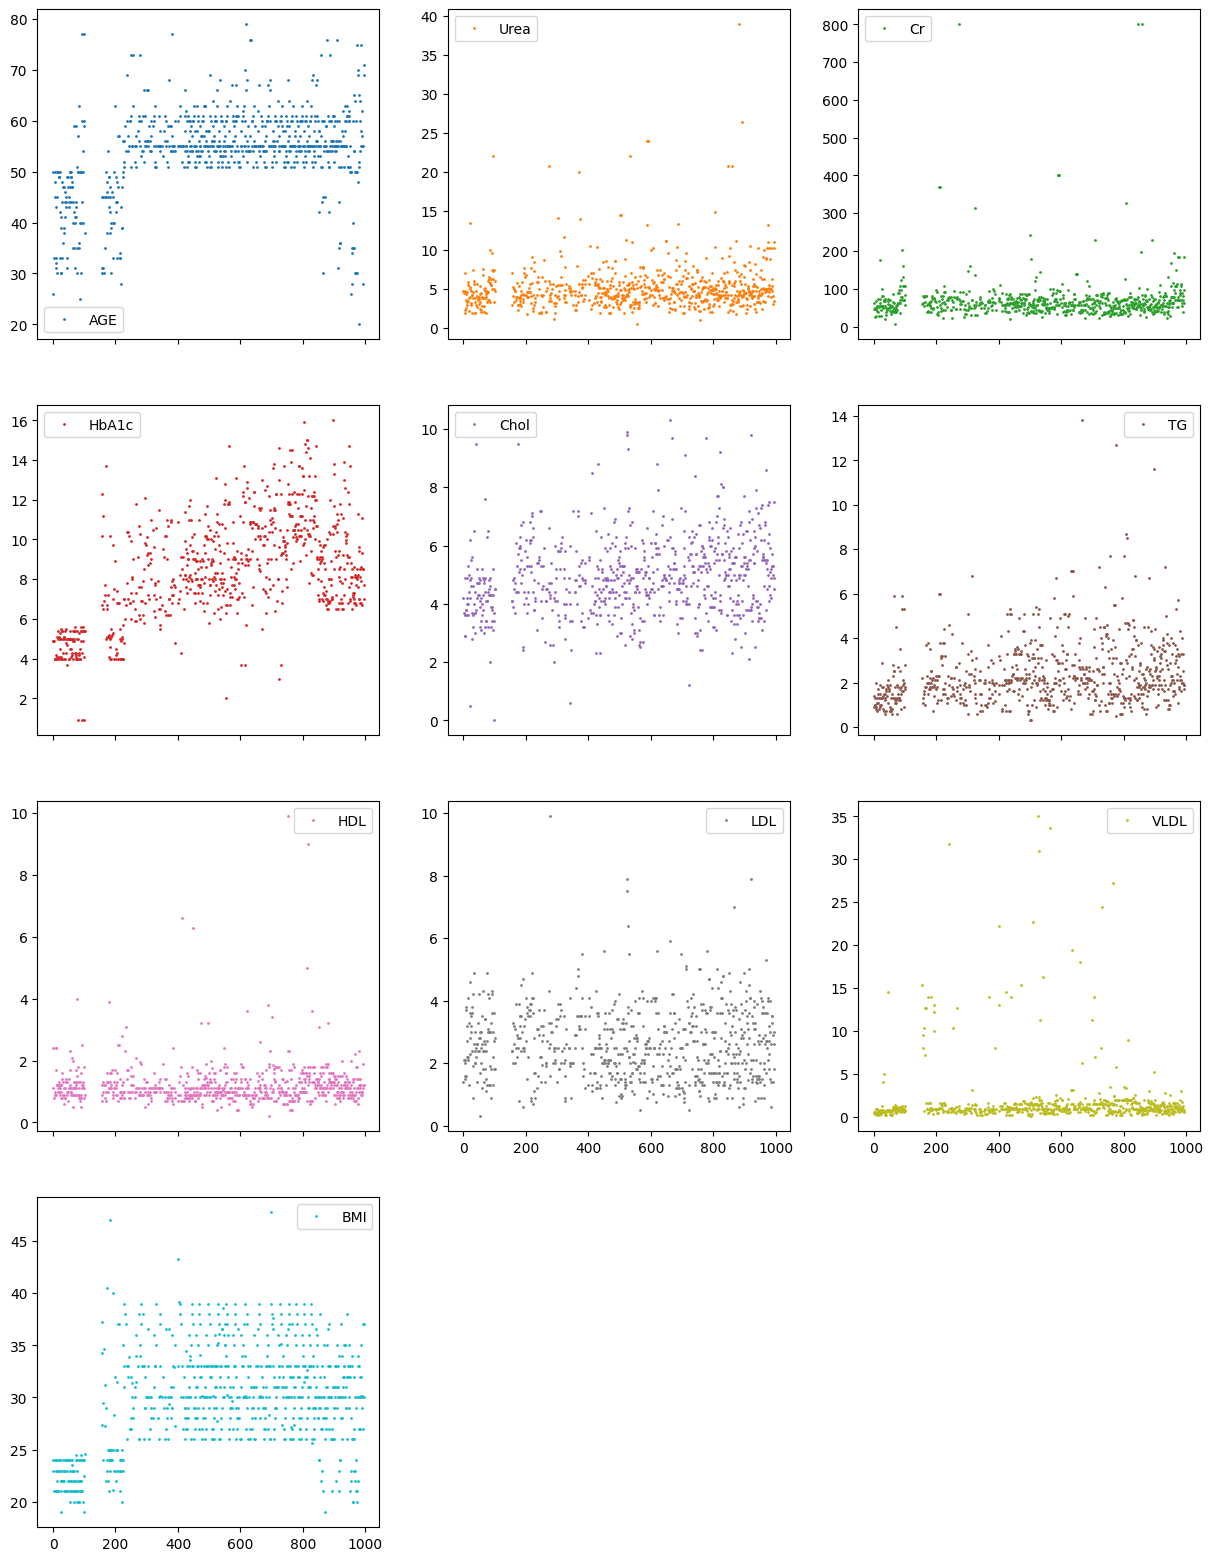

In [23]:
#plotting the global view of the dataset for all numerical features
data.drop(['ID', 'No_Pation'], axis=1).plot(lw=0, marker='.', subplots=True, layout=(6, 3), figsize=(15, 30), markersize=2)


_**Some important features thought to contain unwanted entries or recording errors**_

**Urea** - 1.8 to 7.1 mmol/L is considered normal. _source: [NIH](https://www.ncbi.nlm.nih.gov/books/NBK305/)_. Measurements above 20 may be considered an error, but further research confirms that it's theoretically possible for **Urea** levels to reach such figures, primarily due to the impact of diabetes on kidney function. Low **Urea** levels are complications of diabetes which may be induced by reduced protein intake or certain medications.

**Cr** - Healthy level is 53 to 114.9 µmol/L. _source: [NIH](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4690708/)_. **Cr** subplot shows very high levels of about 800 μmol/L, initially thought to be an error. Further research indicates that such levels are physiologically possible and would suggest severe kidney dysfunction associated with diabetes. Low **Cr** could be induced by reduced muscle mass, malnutrition, and certain medications, all of which are associated with diabetes.

**HbA1c** - Non-diabetic is below 5.7%. Between 5.7% to 6.4% is considered to be predict-diabetic, while 6.5% or higher is diabetic. It is technically possible to reach as high as 16. _source: [NIH](https://www.ncbi.nlm.nih.gov/books/NBK549816/)_

**Chol** - Healthy level below 5 mmol/L. _source: [NHS](https://www.nhs.uk/conditions/high-cholesterol/cholesterol-levels/)_. Cholesterol levels can reach as high as 10 mmol/L, indicating severe hyperlipidemia, which is often associated with diabetes. Cholesterol levels can also be as low as 0.5 or 0.6 mmol/L, may be associated with certain medical conditions or dietary factors but a cholesterol level of zero would be incompatible with life, so that row will be dropped as a possible error.

**TG** - Measured in mmol/L. Normal level is below 1.7, Borderline high between 1.7 and 2, High between 2 and 6, and Very high is over 6. _source [betterhealth.vic.gov.au](https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/triglycerides)_. <br>So it is technically possible to have a level up to 14.

**HDL** - healthy level is above 1.1 mmol/L. Ideally 1.4 mmol/L. Over 2.3mmol/L, HDL may behave more like LDL. _source: [heartuk.org](https://www.heartuk.org.uk/genetic-conditions/high-hdl-cholesterol)_. HDL levels above 5 mmol/L may be biologically implausible, to be considered errors, and will be dropped.

**LDL** - healthy level is below 3 mmol/L. _source: [heartuk.org.uk](https://www.heartuk.org.uk/cholesterol/understanding-your-cholesterol-test-results-)_. Above  4.9 mmol/L is very high. _source: [medlineplus.gov](https://medlineplus.gov/ldlthebadcholesterol.html)_. LDL levels above 6 mmol/L may be biologically implausible and will be considered errors, which will be dropped.

**VLDL** - Normal VLDL level is 0.05 to 0.78 mmol/L. _source: [medlineplus.gov](https://medlineplus.gov/ency/patientinstructions/000386.htm)_. By this, a VLDL level above 5 mmol/L may be technically impossible and should be dropped as error.

**BMI** - Unit is kg/m^2. Below 18.5 is underweight, 18.5 to 24.9 is a healthy weight, 25 to 29.9 is overweight, 30 to 39.9 is obese, and 40 or above is severely obese. However, since the dataset is from the Middle East, 23 to 27.4 is considered overweight, and 27.5 or above is considered obese. Obesity is a serious health concern that increases the risk of diabetes. _source: [NHS](https://www.nhs.uk/conditions/obesity/)_

In [24]:
_old = data.copy()
print('Before dropping unwanted entries, there are now {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

Before dropping unwanted entries, there are now 786 rows and 14 columns in the dataset.


In [25]:
# Dropping row with cholesterol level of 0
data = data[data['Chol'] > 0]

# Dropping rows in HDL above 5 mmol/L
data = data[data['HDL'] <= 5]

# Dropping rows in LDL above 6 mmol/L
data = data[data['LDL'] <= 6]

# Dropping rows in VLDL above 5 mmol/l
data = data[data['VLDL'] <= 5]

print('There are now {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

There are now 735 rows and 14 columns in the dataset.



**_No need for a box plot to show outliers, as there are many unusual entries that have been explained in the section directly above._**


#### Exploratory Data Analysis /  Content Investigation

In [26]:
#listing important numerical columns
n_cols = data.drop(['ID', 'No_Pation'], axis=1).select_dtypes(include='number').columns
print('There are {} important numerical columns.'.format(len(n_cols)))

There are 10 important numerical columns.


In [27]:
#checking the number of unique values for each numerical column
for i in n_cols:
    print(f'For {i}: ')
    print('There are {} unique values'.format(data[i].nunique()))
    print('_________________________________________')

For AGE: 
There are 50 unique values
_________________________________________
For Urea: 
There are 101 unique values
_________________________________________
For Cr: 
There are 111 unique values
_________________________________________
For HbA1c: 
There are 111 unique values
_________________________________________
For Chol: 
There are 68 unique values
_________________________________________
For TG: 
There are 63 unique values
_________________________________________
For HDL: 
There are 39 unique values
_________________________________________
For LDL: 
There are 58 unique values
_________________________________________
For VLDL: 
There are 32 unique values
_________________________________________
For BMI: 
There are 35 unique values
_________________________________________


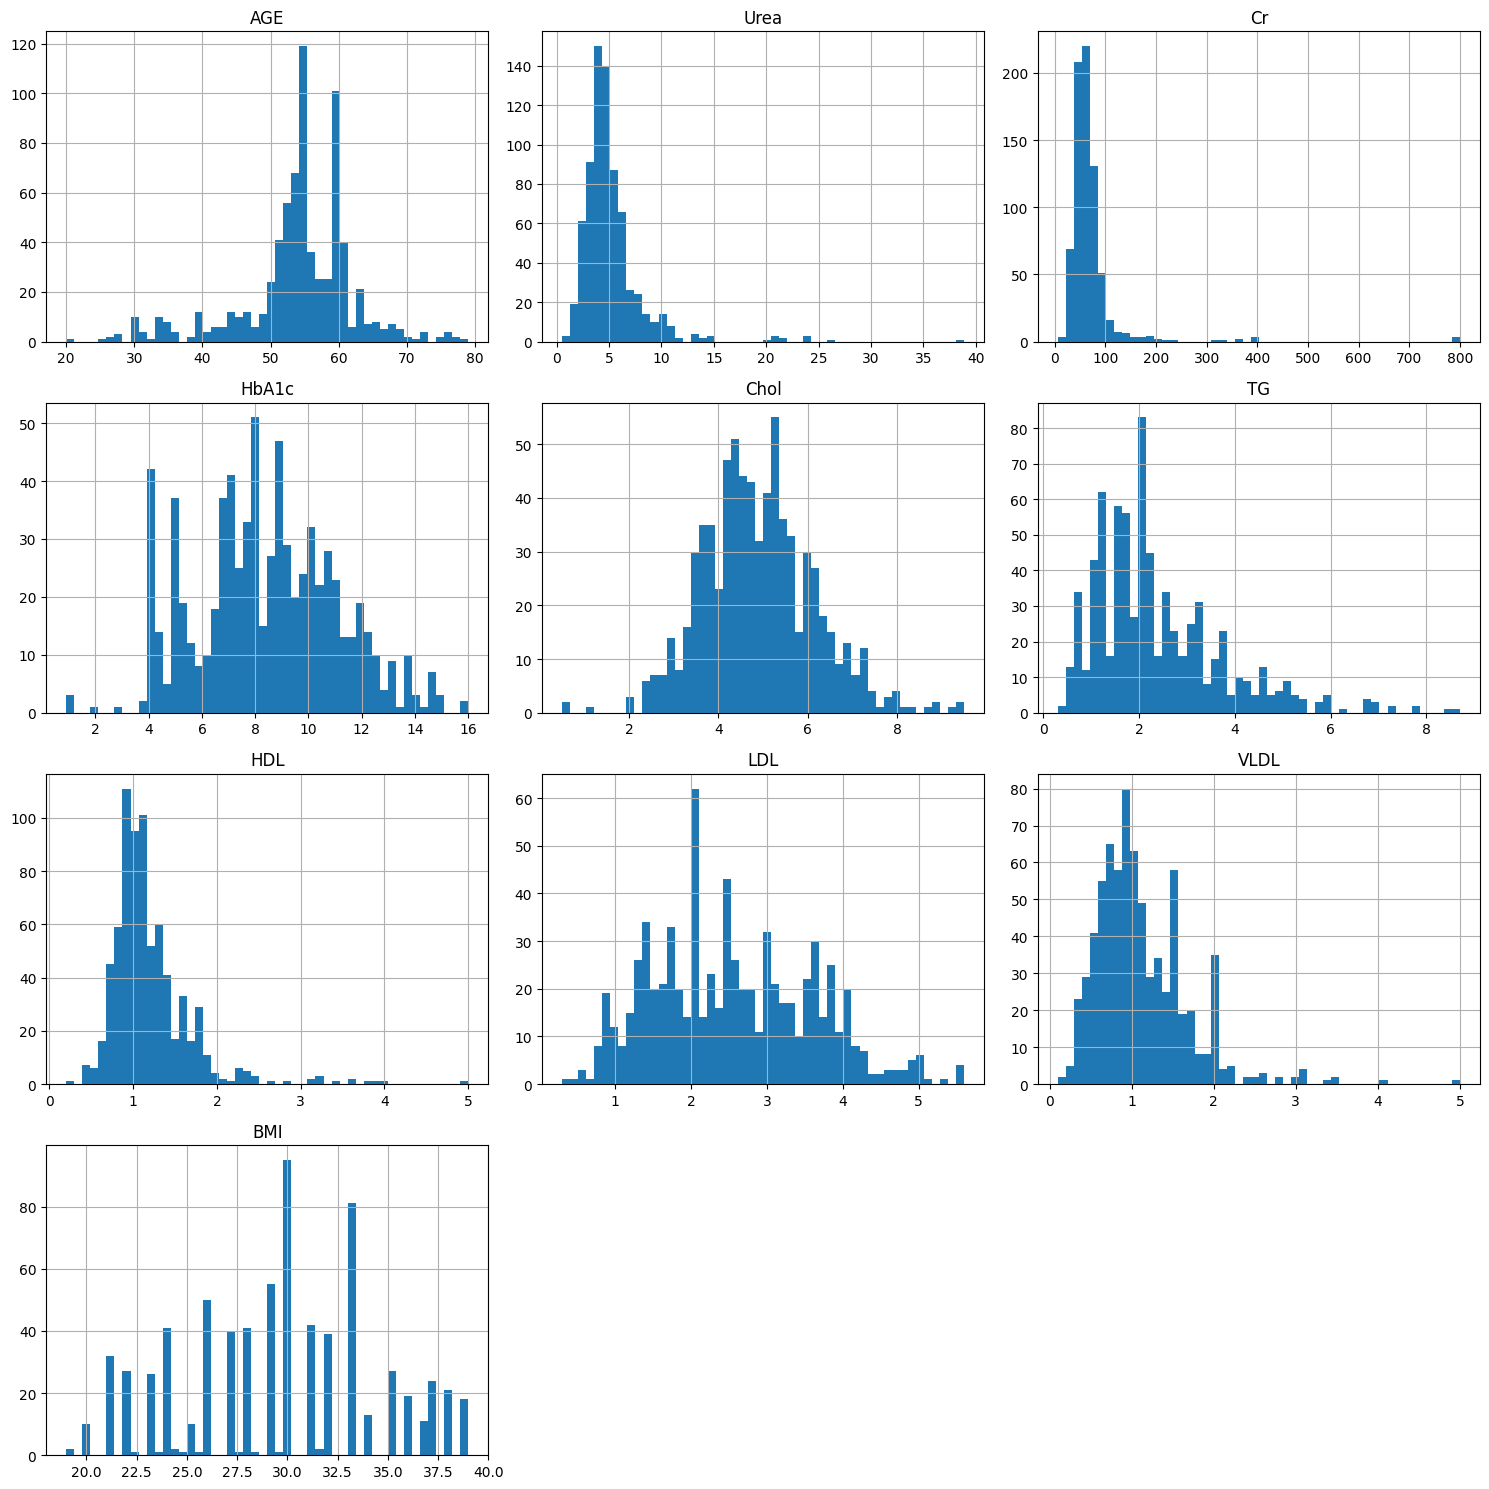

In [28]:
# visualizing the distribution of numerical columns
data.drop(['ID', 'No_Pation'], axis=1).hist(bins=50, figsize=(15, 15))
plt.tight_layout()

In [29]:
# visualizing patterns, relationship between numerical features
#sns.pairplot(data.drop(['ID', 'No_Pation'], axis=1), height=1.5, plot_kws={'s': 2, 'alpha': 0.2})

In [30]:
#listing categorical columns
cat_cols = data.drop(['ID', 'No_Pation'], axis=1).select_dtypes(exclude='number').columns
print('There are {} categorical columns.'.format(len(cat_cols)))

There are 2 categorical columns.


In [31]:
#checking the number of unique values for each categorical columns and the frequency
for i in cat_cols:
    print(f'For {i}: ')
    print('There are {} unique values'.format(data[i].nunique()))
    print('The unique values are: {}'.format(data[i].unique()))
    print('The frequency of each unique value: \n{}\n'.format(data[i].value_counts()))
    print('_________________________________________')

For Gender: 
There are 2 unique values
The unique values are: ['F' 'M']
The frequency of each unique value: 
Gender
M    389
F    346
Name: count, dtype: int64

_________________________________________
For CLASS: 
There are 2 unique values
The unique values are: ['N' 'Y']
The frequency of each unique value: 
CLASS
Y    641
N     94
Name: count, dtype: int64

_________________________________________


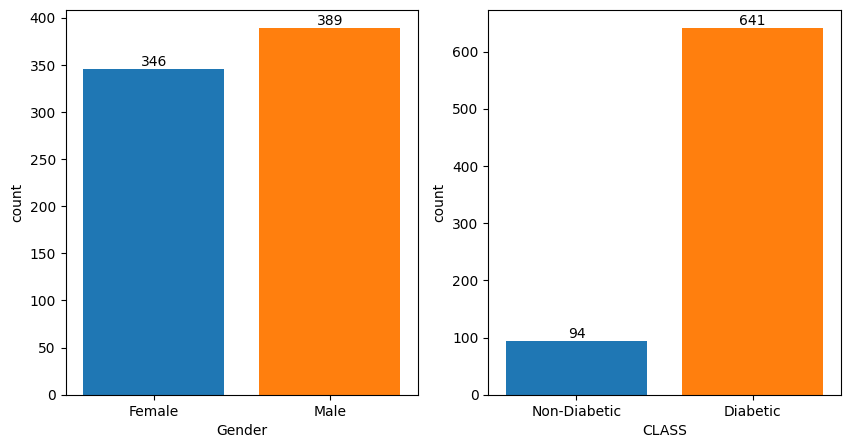

In [32]:
# visualizing the Categorical columns
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
sns.countplot(x='Gender', data=data, saturation = 1, palette = 'tab10', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
ax[0].set_xticklabels(['Female', 'Male'])
sns.countplot(x='CLASS', data=data, saturation = 1, palette = 'tab10', ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].set_xticklabels(['Non-Diabetic', 'Diabetic'])

fig.show()


From the above diagram, the target variable 'CLASS' appears to be heavily imbalanced.


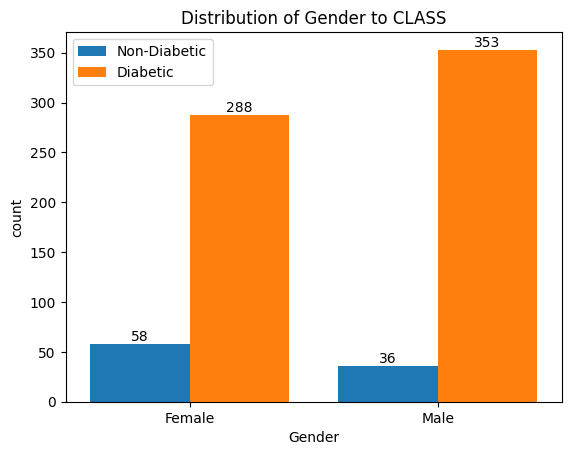

In [33]:
# distribution of Gender and CLASS
ax = sns.countplot(x='Gender', hue='CLASS', saturation = 1, data=data)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xticklabels(['Female', 'Male'])
plt.title('Distribution of Gender to CLASS')
plt.legend(['Non-Diabetic', 'Diabetic'])
#plt.xlabel('Gender (F = Female, M = Male)')
#plt.ylabel('Frequency')
plt.show()

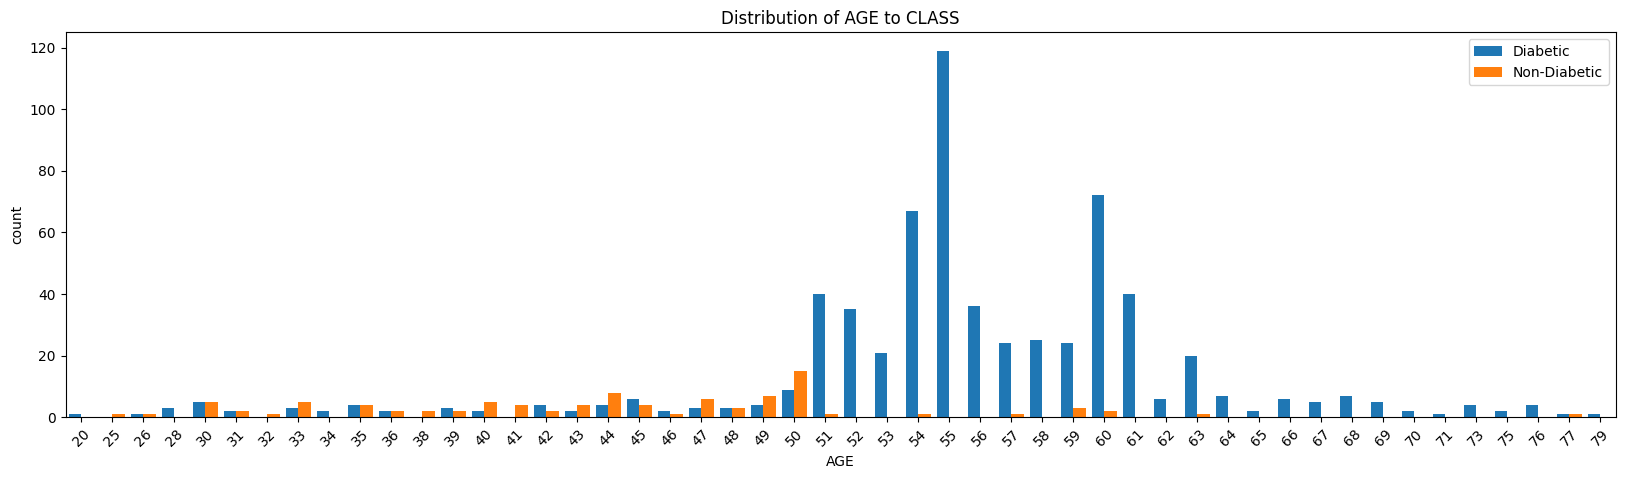

In [34]:
# distribution of AGE and CLASS
plt.figure(figsize=(20,5))
sns.countplot(x='AGE', hue='CLASS', saturation = 1, palette = 'tab10', data=data)
plt.xticks(rotation=45)
plt.legend(['Diabetic', 'Non-Diabetic'])
plt.title('Distribution of AGE to CLASS')
plt.show()


From the figure above, the risk of diabetes increases with age.


In [35]:
# keeping the orignal dataframe clean
plot_ = data.copy()

##### Plot function for distribution of features to the CLASS

In [36]:
#features to class
def plot_cat(groups, feature, title, xlabel, ylabel, figsize, rotation=(False,0)):
    # the order of x-axis
    order = []
    for key, value in groups.items():
        if value[1] == float('inf'):
            order.append('{} ({} and above)'.format(key,value[0]))
        else:
            order.append('{} ({} - {})'.format(key,value[0],value[1]))
    
    # Categorize feature levels into groups
    def categorize_feature(values):
        for group, (low, high) in groups.items():
            if low <= values <= high:
                if high == float('inf'):
                    return group + f' ({low} and above)'
                else:
                    return group + f' ({low} - {high})'
                    
    new_feature = feature + '_Group'
    # Apply categorization to the DataFrame
    plot_[new_feature] = plot_[feature].apply(categorize_feature)
    
    # Plotting
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=new_feature, hue='CLASS', saturation=1, data=plot_, order=order)
    plt.legend(['Non-Diabetic', 'Diabetic'])
    plt.title(title)
    for con in range(len(ax.containers)):
        ax.bar_label(ax.containers[con])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if rotation[0] == True:
        plt.xticks(rotation=rotation[1], ha='right')
    plt.tight_layout()
    plt.show()

#bmi to sugar level plot
def plot_other(group_1, group_2, feature_1, feature_2, title, xlabel, ylabel, figsize, rotation=(False,0)):
    # the order of x and y axes
    order_1 = []
    for key, value in group_1.items():
        if value[1] == float('inf'):
            order_1.append('{} ({} and above)'.format(key,value[0]))
        else:
            order_1.append('{} ({} - {})'.format(key,value[0],value[1]))

    order_2 = []
    for key, value in group_2.items():
        if value[1] == float('inf'):
            order_2.append('{} ({} and above)'.format(key,value[0]))
        else:
            order_2.append('{} ({} - {})'.format(key,value[0],value[1]))
            
    # Categorize feature_1 levels into groups
    def categorize_feature_1(values):
        for group, (low, high) in group_1.items():
            if low <= values <= high:
                if high == float('inf'):
                    return group + f' ({low} and above)'
                else:
                    return group + f' ({low} - {high})'

     # Categorize feature_2 levels into groups
    def categorize_feature_2(values):
        for group, (low, high) in group_2.items():
            if low <= values <= high:
                if high == float('inf'):
                    return group + f' ({low} and above)'
                else:
                    return group + f' ({low} - {high})'
                    
                    
    new_feature_1 = feature_1 + '_Group'
    new_feature_2 = feature_2 + '_Group'
    
    # Apply categorization to the DataFrame
    plot_[new_feature_1] = plot_[feature_1].apply(categorize_feature_1)
    plot_[new_feature_2] = plot_[feature_2].apply(categorize_feature_2)
    
    # Plotting
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=new_feature_1, hue=new_feature_2, saturation=1, data=plot_, order=order_1)
    #plt.legend(['Non-Diabetic', 'Diabetic'])
    plt.title(title)
    for con in range(len(ax.containers)):
        ax.bar_label(ax.containers[con])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if rotation[0] == True:
        plt.xticks(rotation=rotation[1], ha='right')
    plt.tight_layout()
    plt.show()

##### Distribution of features to CLASS

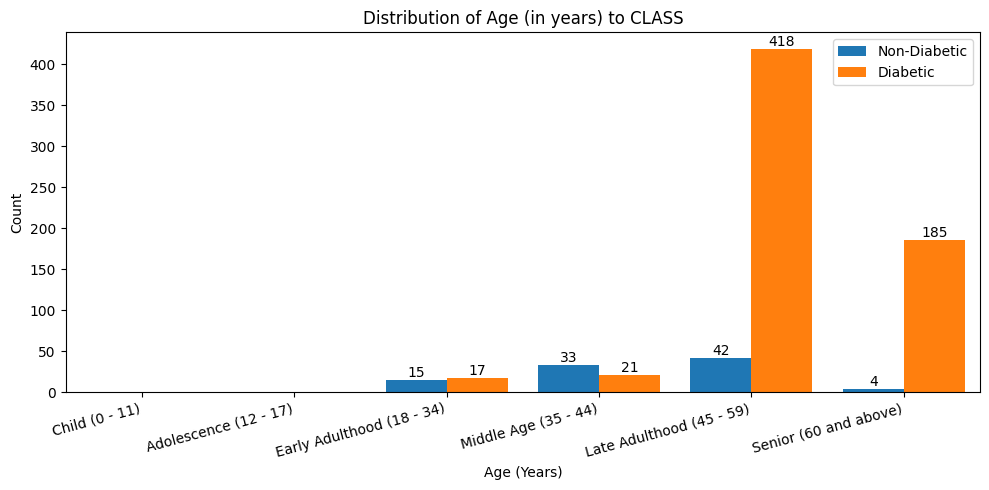

In [37]:
# distribution of AGE and CLASS in categorical bins
# Define the groups and corresponding labels
age_groups = {
    'Child': (0, 11),
    'Adolescence': (12, 17),
    'Early Adulthood': (18, 34),
    'Middle Age': (35, 44),
    'Late Adulthood': (45, 59),
    'Senior': (60, float('inf'))  # 'float('inf')' represents positive infinity
}
feature = 'AGE'
title = 'Distribution of Age (in years) to CLASS'
xlabel = 'Age (Years)'
ylabel = 'Count'
figsize = (10,5)
plot_cat(age_groups, feature, title, xlabel, ylabel, figsize, rotation=(True, 15))

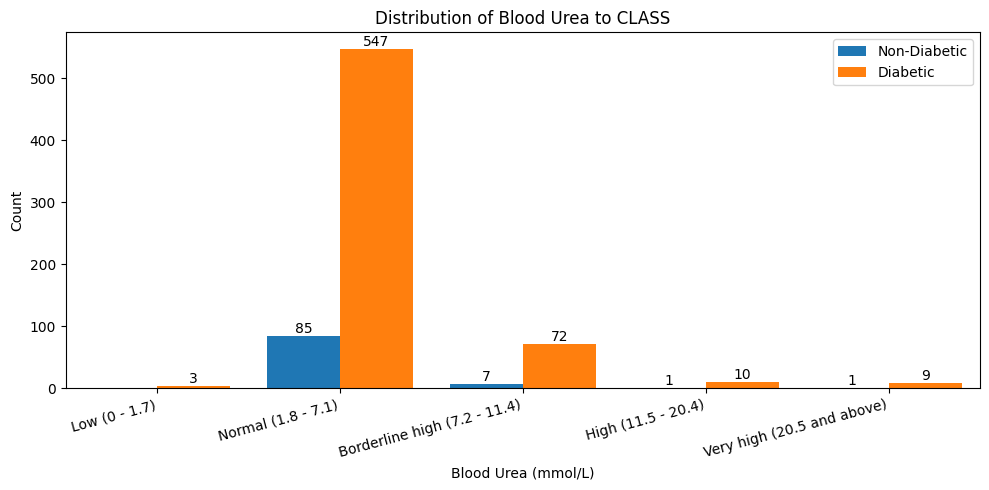

In [38]:
# distribution of Urea and CLASS
urea_groups = {
    'Low': (0, 1.7),
    'Normal': (1.8, 7.1),
    'Borderline high': (7.2, 11.4),
    'High': (11.5, 20.4),
    'Very high': (20.5, float('inf'))
}
feature = 'Urea'
title = 'Distribution of Blood Urea to CLASS'
xlabel = 'Blood Urea (mmol/L)'
ylabel = 'Count'
figsize = (10,5)
plot_cat(urea_groups, feature, title, xlabel, ylabel, figsize, rotation=(True, 15))

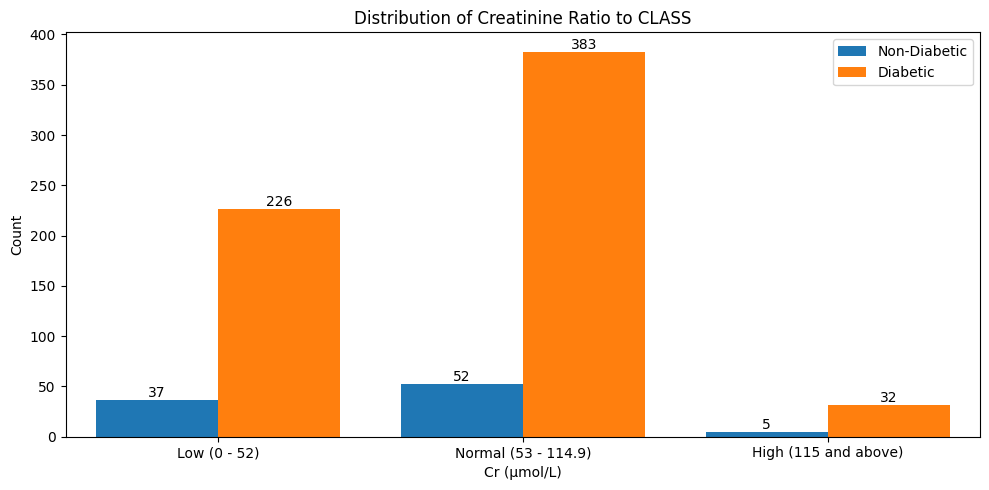

In [39]:
# distribution of Cr and CLASS
cr_groups = {
    'Low': (0, 52),
    'Normal': (53, 114.9),
    'High': (115, float('inf'))
}
feature = 'Cr'
title = 'Distribution of Creatinine Ratio to CLASS'
xlabel = 'Cr (µmol/L)'
ylabel = 'Count'
figsize = (10,5)
plot_cat(cr_groups, feature, title, xlabel, ylabel, figsize)

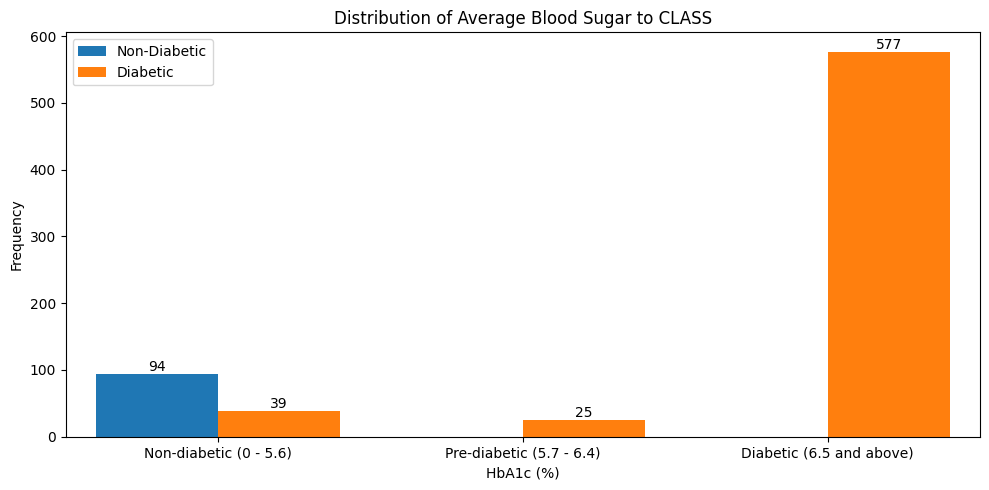

In [40]:
# distribution of HbA1c and CLASS
sugar_groups = {
    'Non-diabetic': (0, 5.6),
    'Pre-diabetic': (5.7, 6.4),
    'Diabetic': (6.5, float('inf'))
}
feature = 'HbA1c'
title = 'Distribution of Average Blood Sugar to CLASS'
xlabel = 'HbA1c (%)'
ylabel = 'Frequency'
figsize = (10,5)
plot_cat(sugar_groups, feature, title, xlabel, ylabel, figsize)


The plot above demonstrates a direct correlation between the 'HbA1c' biomarker and the target variable CLASS, suggesting its potential as a predictor of the outcome. The elevated levels of HbA1c indicate the presence of diabetes. However, to prevent potential issues during training, this feature will be excluded from the model development.


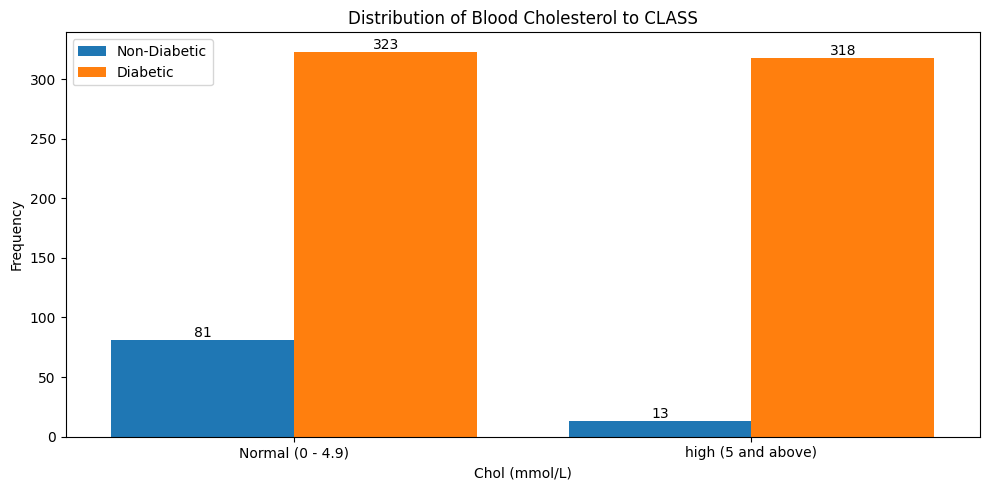

In [41]:
# distribution of Chol and CLASS
groups = {
    'Normal': (0, 4.9),
    'high': (5, float('inf'))
}
feature = 'Chol'
title = 'Distribution of Blood Cholesterol to CLASS'
xlabel = 'Chol (mmol/L)'
ylabel = 'Frequency'
figsize = (10,5)
plot_cat(groups, feature, title, xlabel, ylabel, figsize)

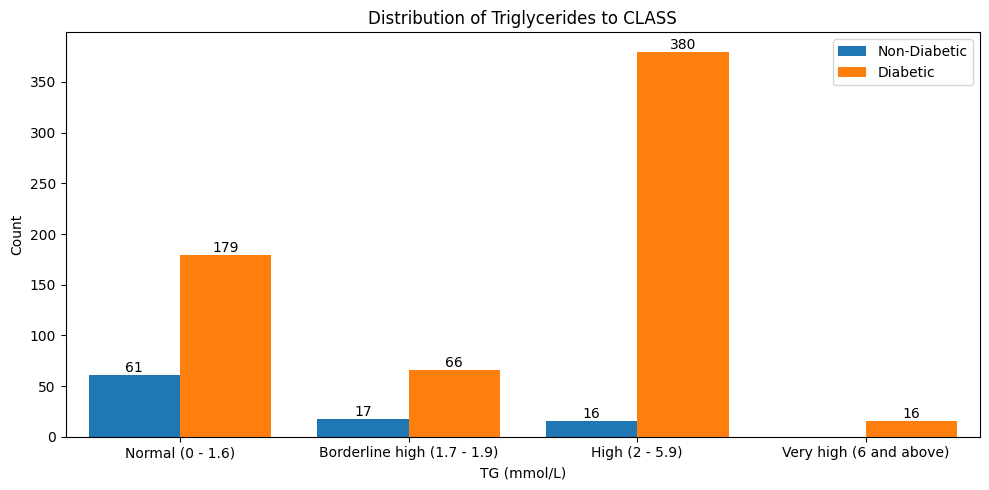

In [42]:
# distribution of TG and CLASS
groups = {
    'Normal': (0, 1.6),
    'Borderline high': (1.7, 1.9),
    'High': (2, 5.9),
    'Very high': (6, float('inf'))
}
feature = 'TG'
title = 'Distribution of Triglycerides to CLASS'
xlabel = 'TG (mmol/L)'
ylabel = 'Count'
figsize = (10,5)
plot_cat(groups, feature, title, xlabel, ylabel, figsize)

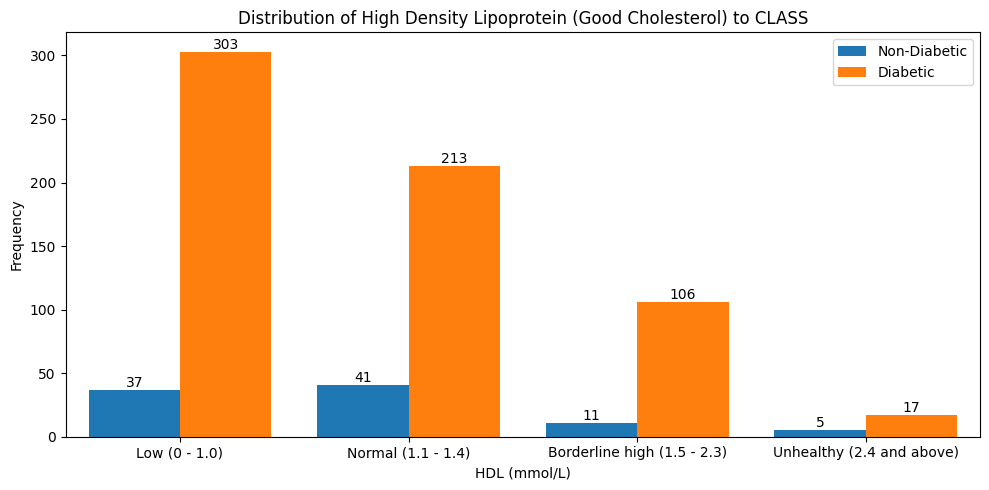

In [43]:
# distribution of HDL and CLASS
groups = {
    'Low': (0, 1.0),
    'Normal': (1.1, 1.4),
    'Borderline high': (1.5, 2.3),
    'Unhealthy': (2.4, float('inf'))
}
feature = 'HDL'
title = 'Distribution of High Density Lipoprotein (Good Cholesterol) to CLASS'
xlabel = 'HDL (mmol/L)'
ylabel = 'Frequency'
figsize = (10,5)
plot_cat(groups, feature, title, xlabel, ylabel, figsize)

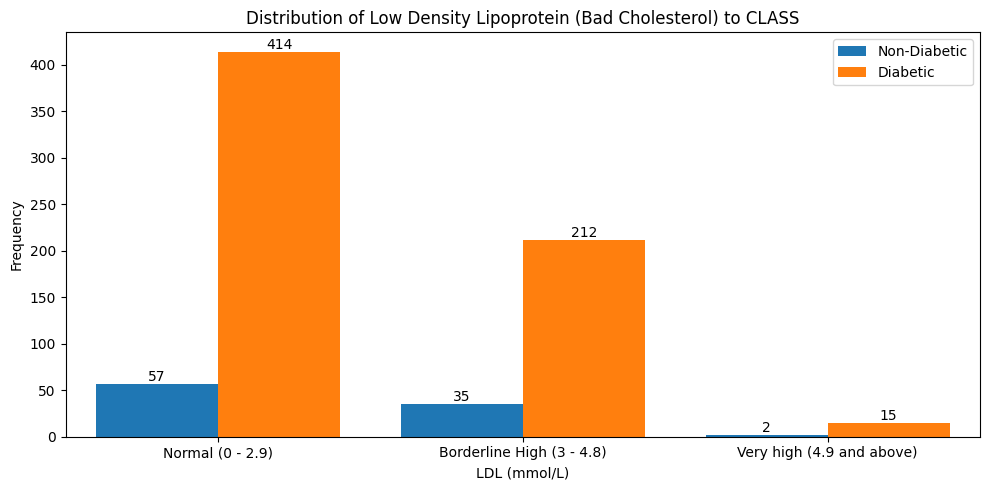

In [44]:
# distribution of LDL and CLASS
groups = {
    'Normal': (0, 2.9),
    'Borderline High': (3, 4.8),
    'Very high': (4.9, float('inf'))
}
feature = 'LDL'
title = 'Distribution of Low Density Lipoprotein (Bad Cholesterol) to CLASS'
xlabel = 'LDL (mmol/L)'
ylabel = 'Frequency'
figsize = (10,5)
plot_cat(groups, feature, title, xlabel, ylabel, figsize)

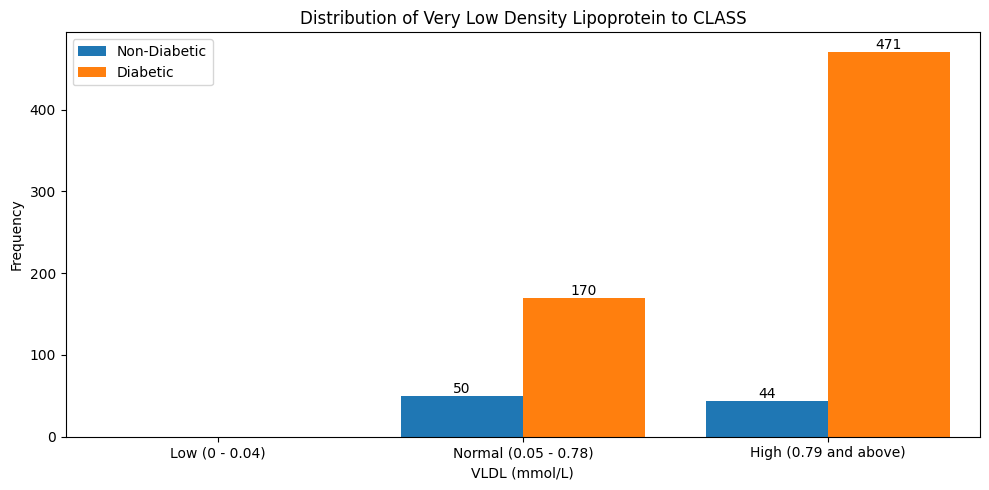

In [45]:
# distribution of VLDL and CLASS
groups = {
    'Low': (0, 0.04),
    'Normal': (0.05, 0.78),
    'High': (0.79, float('inf'))
}
feature = 'VLDL'
title = 'Distribution of Very Low Density Lipoprotein to CLASS'
xlabel = 'VLDL (mmol/L)'
ylabel = 'Frequency'
figsize = (10,5)
plot_cat(groups, feature, title, xlabel, ylabel, figsize)

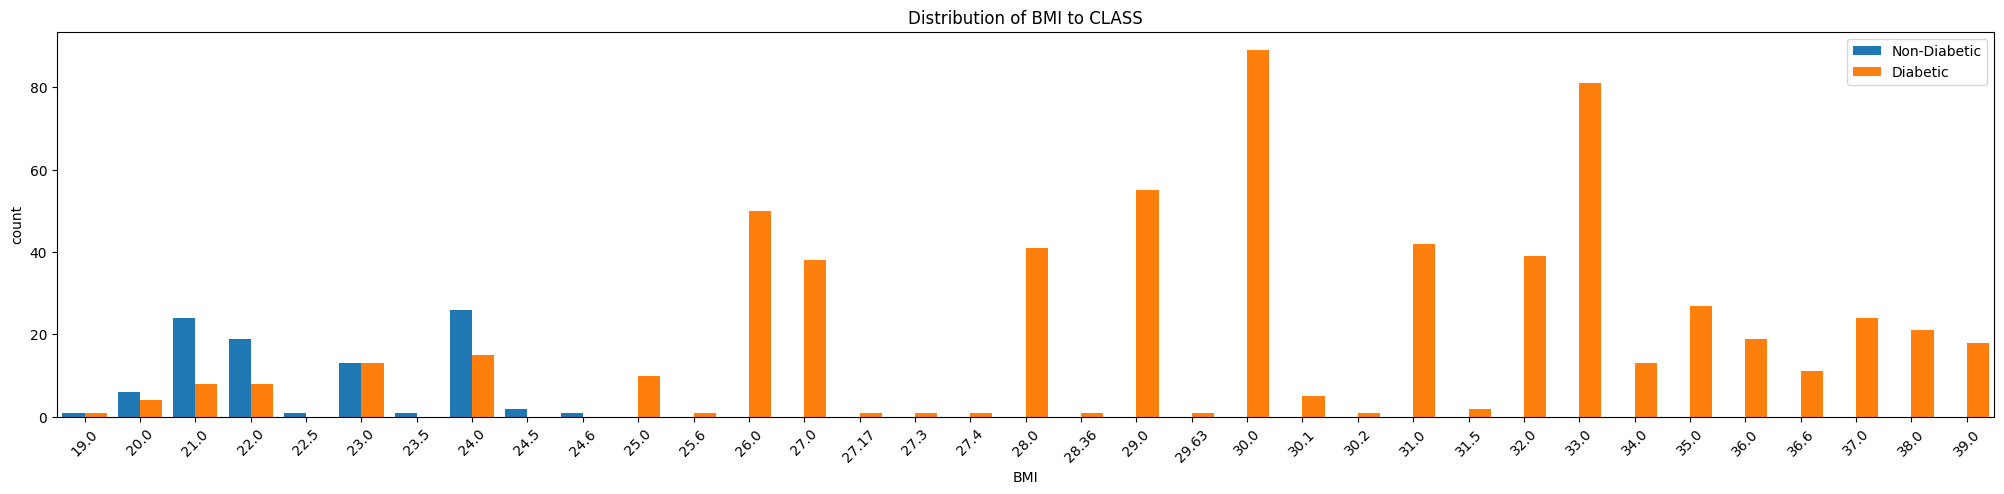

In [46]:
# Normal distribution of BMI and CLASS
plt.figure(figsize=(25,5))
sns.countplot(x='BMI', hue='CLASS', saturation = 1, data=data)
plt.xticks(rotation=45)
plt.title('Distribution of BMI to CLASS')
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.show()


From the above figure, the risk of diabetes is high for people in the obese category.


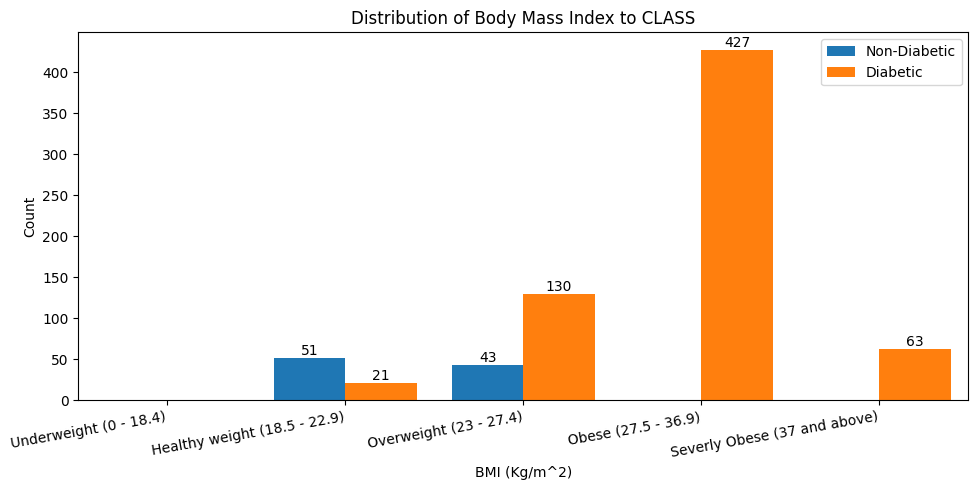

In [47]:
# Clearer distribution of BMI in categorical bins to CLASS
bmi_groups = {
    'Underweight': (0, 18.4),
    'Healthy weight': (18.5, 22.9),
    'Overweight': (23, 27.4),
    'Obese': (27.5, 36.9),
    'Severly Obese': (37, float('inf'))
}
feature = 'BMI'
title = 'Distribution of Body Mass Index to CLASS'
xlabel = 'BMI (Kg/m^2)'
ylabel = 'Count'
figsize = (10,5)
plot_cat(bmi_groups, feature, title, xlabel, ylabel, figsize, rotation=(True, 10))


From the plot above, there's a clear trend showing that the risk of diabetes rises as body mass index increases. This suggests that individuals who are overweight are more likely to develop diabetes.


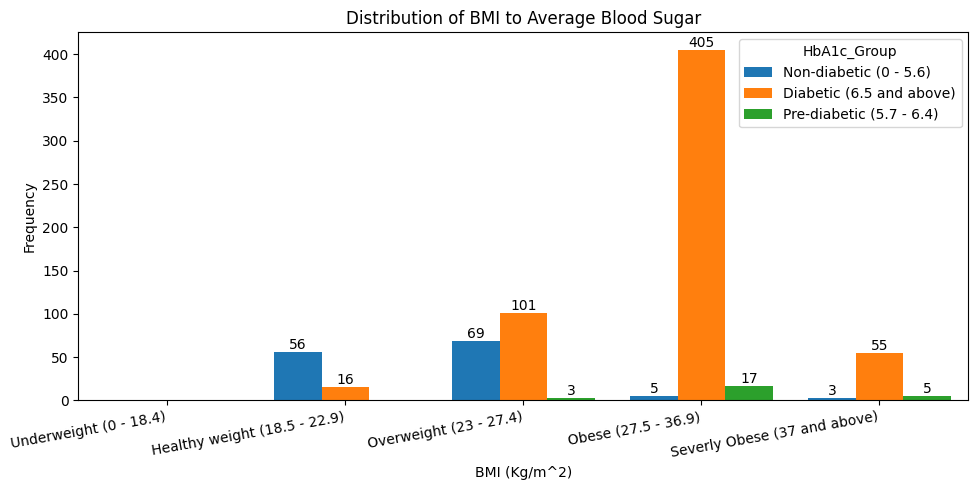

In [48]:
# Distribution of BMI in categorical bins to Average Blood Sugar
feature_1 = 'BMI'
feature_2 = 'HbA1c'
title = 'Distribution of BMI to Average Blood Sugar'
xlabel = 'BMI (Kg/m^2)'
ylabel = 'Frequency'
figsize = (10,5)
plot_other(bmi_groups, sugar_groups, feature_1, feature_2, title, xlabel, ylabel, figsize, rotation=(True,10))


## Feature Engineering

Here, a new set of features is being derived from existing ones to enhance the relevance of the dataset. Subsequently, unimportant features will be excluded from the final dataset prior to developing the model.


In [49]:
# making sure nothing is lost
old_ = data.copy()


'ID' and 'No_Pation' supposedly 'No_Patient' were both dropped because they both have no real purpose, just identifers of each sample.
'HbA1c' has a high association with the target variable.


In [50]:
# removing unwanted features
data = data.drop(['ID', 'No_Pation', 'HbA1c'], axis=1)
data.head()

,Gender,AGE,Urea,Cr,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,3.7,1.4,1.1,2.1,0.6,23.0,N
4,M,33,7.1,46,4.9,1.0,0.8,2.0,0.4,21.0,N
5,F,45,2.3,24,2.9,1.0,1.0,1.5,0.4,21.0,N
6,F,50,2.0,50,3.6,1.3,0.9,2.1,0.6,24.0,N


In [51]:
# size of the dataset after dropping unwanted features
data.shape
print('There are {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

There are 735 rows and 11 columns in the dataset.



## Data Encoding


In [52]:
# make a list of features to be encoded
col_encode = data.select_dtypes(exclude='number').columns
col_encode

Index(['Gender', 'CLASS'], dtype='object')

In [53]:
# listing the unique values for each of the non-numerical columns
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [54]:
data.CLASS.unique()

array(['N', 'Y'], dtype=object)

In [55]:
#encoding categorical features to numerical
data.Gender.replace({'F': 0, 'M': 1}, inplace=True)
data.CLASS.replace({'N': 0, 'Y': 1}, inplace=True)

In [56]:
data.head()

,Gender,AGE,Urea,Cr,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,3.7,1.4,1.1,2.1,0.6,23.0,0
4,1,33,7.1,46,4.9,1.0,0.8,2.0,0.4,21.0,0
5,0,45,2.3,24,2.9,1.0,1.0,1.5,0.4,21.0,0
6,0,50,2.0,50,3.6,1.3,0.9,2.1,0.6,24.0,0


In [57]:
data.tail()

,Gender,AGE,Urea,Cr,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
990,0,57,4.1,70,5.3,3.3,1.0,1.4,1.3,29.0,1
992,1,55,3.1,39,5.0,2.5,1.9,2.9,0.7,27.0,1
993,1,28,3.5,61,4.5,1.9,1.1,2.6,0.8,37.0,1
994,1,69,10.3,185,4.9,1.9,1.2,3.0,0.7,37.0,1
995,1,71,11.0,97,7.5,1.7,1.2,1.8,0.6,30.0,1


In [58]:
# getting info on the data after encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 995
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  735 non-null    int64  
 1   AGE     735 non-null    int64  
 2   Urea    735 non-null    float64
 3   Cr      735 non-null    int64  
 4   Chol    735 non-null    float64
 5   TG      735 non-null    float64
 6   HDL     735 non-null    float64
 7   LDL     735 non-null    float64
 8   VLDL    735 non-null    float64
 9   BMI     735 non-null    float64
 10  CLASS   735 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 68.9 KB


In [59]:
# checking for missing values after encoding
data.isnull().sum()

Gender    0
AGE       0
Urea      0
Cr        0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [60]:
# displaying statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,735.0,0.529252,0.499484,0.0,0.0,1.0,1.00,1.0
AGE,735.0,54.155102,8.411773,20.0,51.0,55.0,60.00,79.0
Urea,735.0,5.244490,3.200361,0.5,3.6,4.6,5.85,38.9
Cr,735.0,68.923810,61.816792,6.0,46.0,58.0,73.00,800.0
Chol,735.0,4.876327,1.241147,0.5,4.0,4.8,5.60,9.5
TG,735.0,2.383265,1.347783,0.3,1.5,2.1,3.00,8.7
HDL,735.0,1.187660,0.494436,0.2,0.9,1.1,1.35,5.0
LDL,735.0,2.544558,1.044208,0.3,1.7,2.5,3.30,5.6
VLDL,735.0,1.087755,0.571186,0.1,0.7,1.0,1.40,5.0
BMI,735.0,29.507973,4.803101,19.0,26.0,30.0,33.00,39.0


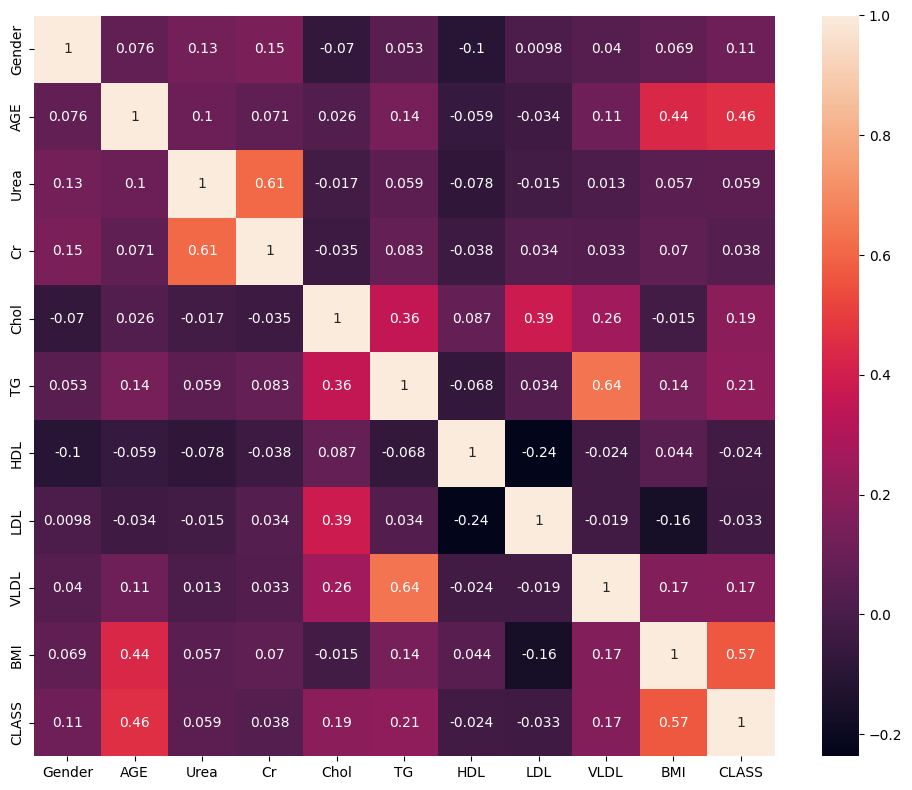

In [61]:
# correlation matrix
corr_matrix = data.corr()
#fig, ax = plt.subplots(figsize = (10,8), layout="constrained")
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, square=True, annot=True)
plt.tight_layout()
plt.show()


## Model Development

Here, we train and fit all the selected models.


### Splitting Dataset

In [62]:
# predictor variables and outcome
X = data.drop('CLASS', axis = 1)
Y = data['CLASS']
X.head()

,Gender,AGE,Urea,Cr,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,3.7,1.4,1.1,2.1,0.6,23.0
4,1,33,7.1,46,4.9,1.0,0.8,2.0,0.4,21.0
5,0,45,2.3,24,2.9,1.0,1.0,1.5,0.4,21.0
6,0,50,2.0,50,3.6,1.3,0.9,2.1,0.6,24.0


In [63]:
# splitting the data to train and test sets
# 80% for train set and 20% for test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(735, 10) (588, 10) (588,) (147, 10) (147,)


### Feature Scaling | Data Normalization

In [64]:
# data normalization - to have a standard scale of measure
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting the models

In [65]:
# creating the baseline models
lg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

#create a list for all models
models = {'lg': lg, 'knn': knn, 'dt': dt}

#full model names
model_names = {'lg': 'Logistic Regression',
              'knn': 'K Neighbors Classifier',
              'dt': 'Decision Tree'
              }

# to compute performance metrics for all models
train_metrics = {model_names['lg']: [], model_names['knn']: [], model_names['dt']: []}
test_metrics = {model_names['lg']: [], model_names['knn']: [], model_names['dt']: []}

#fit the baseline models
for name, model in models.items():

    #fit each model with the train set
    model.fit(X_train_scaled, Y_train)

    # predict with train set
    Y_train_pred = model.predict(X_train_scaled)

    # test the model with the test set
    Y_test_pred = model.predict(X_test_scaled)

    #compute performance metrics on train set
    train_metrics[model_names[name]].append(metrics.accuracy_score(Y_train, Y_train_pred))
    train_metrics[model_names[name]].append(metrics.recall_score(Y_train, Y_train_pred))
    train_metrics[model_names[name]].append(metrics.precision_score(Y_train, Y_train_pred))

    #compute performance metrics on test set
    test_metrics[model_names[name]].append(metrics.accuracy_score(Y_test, Y_test_pred))
    test_metrics[model_names[name]].append(metrics.recall_score(Y_test, Y_test_pred))
    test_metrics[model_names[name]].append(metrics.precision_score(Y_test, Y_test_pred))
    
# display the Performance metrics for the train set
pd.DataFrame.from_dict(train_metrics, orient='index', columns=['Accuracy', 'Recall', 'Precision'])

,Accuracy,Recall,Precision
Logistic Regression,0.943878,0.992203,0.946097
K Neighbors Classifier,0.959184,0.968811,0.984158
Decision Tree,1.000000,1.000000,1.000000


In [66]:
# display the Performance metrics for the test set
pd.DataFrame.from_dict(test_metrics, orient='index', columns=['Accuracy', 'Recall', 'Precision'])

,Accuracy,Recall,Precision
Logistic Regression,0.925170,0.984375,0.933333
K Neighbors Classifier,0.918367,0.976562,0.932836
Decision Tree,0.952381,0.976562,0.968992


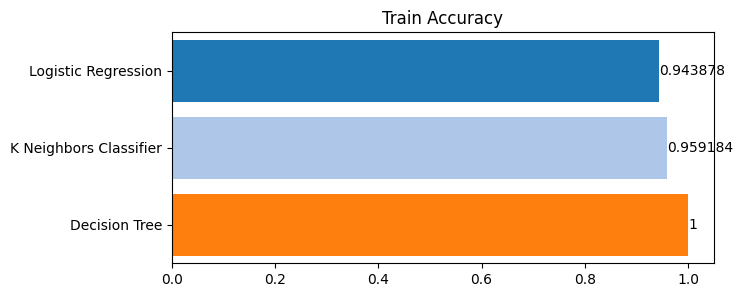

In [67]:
# visualizing accuracy on the train set
t_models = list(model_names.values())
t_accuracy = [train_metrics[model_names['lg']][0], train_metrics[model_names['knn']][0], train_metrics[model_names['dt']][0]]
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(y=t_models,x=t_accuracy, saturation=1, palette='tab20', ax=ax)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Train Accuracy')
fig.show()

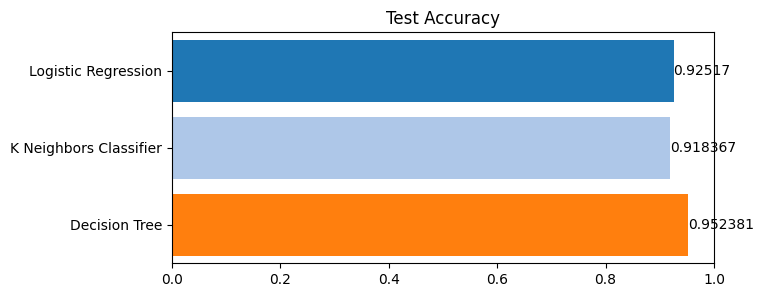

In [68]:
# visualizing accuracy on the test set
t_models = list(model_names.values())
t_accuracy = [test_metrics[model_names['lg']][0], test_metrics[model_names['knn']][0], test_metrics[model_names['dt']][0]]
fig, ax = plt.subplots(figsize=(7, 3))
sns.barplot(y=t_models,x=t_accuracy, saturation=1, palette='tab20', ax=ax)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Test Accuracy')
fig.show()

In [69]:
# display the classification report for all three baseline models
for name, model in models.items():
    print('Classification Report for {}'.format(model_names[name]))
    Y_pred = model.predict(X_test_scaled)
    print(metrics.classification_report(Y_test, Y_pred))
    print('___________________________________________________________')

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.93      0.98      0.96       128

    accuracy                           0.93       147
   macro avg       0.88      0.76      0.80       147
weighted avg       0.92      0.93      0.92       147

___________________________________________________________
Classification Report for K Neighbors Classifier
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.93      0.98      0.95       128

    accuracy                           0.92       147
   macro avg       0.85      0.75      0.79       147
weighted avg       0.91      0.92      0.91       147

___________________________________________________________
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.79   

Confusion Matrix Display for Logistic Regression
TN=10, FP=9, FN=2, TP=126


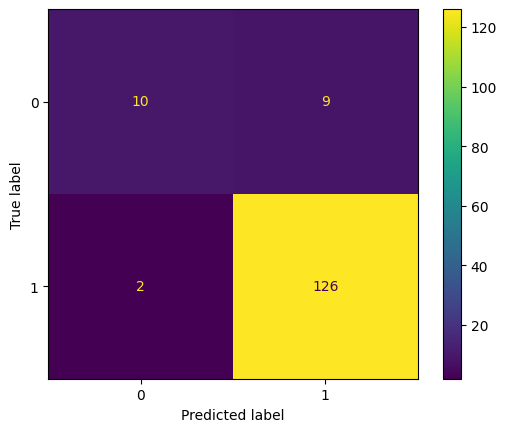

Confusion Matrix Display for K Neighbors Classifier
TN=10, FP=9, FN=3, TP=125


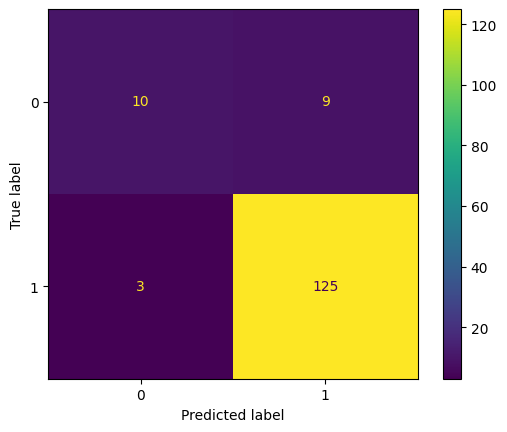

Confusion Matrix Display for Decision Tree
TN=15, FP=4, FN=3, TP=125


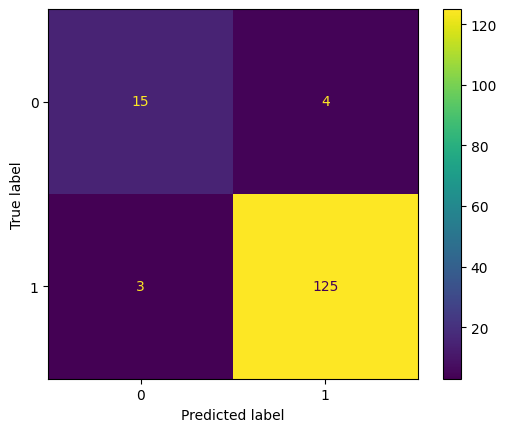

In [70]:
# displaying confusion matrix for all three models on test set
for name, model in models.items():
    print('Confusion Matrix Display for {}'.format(model_names[name]))
    Y_pred = model.predict(X_test_scaled)
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

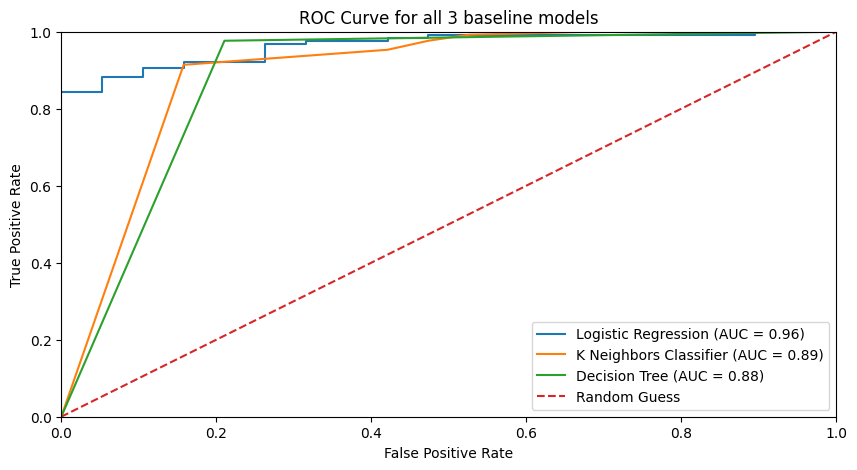

In [71]:
# Visualizing the ROC curve
plt.figure(figsize=(10, 5))
for key, model in models.items():
    Y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
    auc = metrics.roc_auc_score(Y_test, Y_pred_prob)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model_names[key], auc))

plt.plot([0, 1], [0, 1], '--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all 3 baseline models')
plt.legend()
plt.show()

## Model Optimization

### Applying sampling technique to balance the dataset

In [72]:
# using SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

In [73]:
# splitting dataset for predictor variables and target to avoid having synthetic data in the train set after resampling
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)

In [74]:
# data normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Apply SMOTE
smote =  SMOTE(random_state=42)
X_train_resampled,Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)

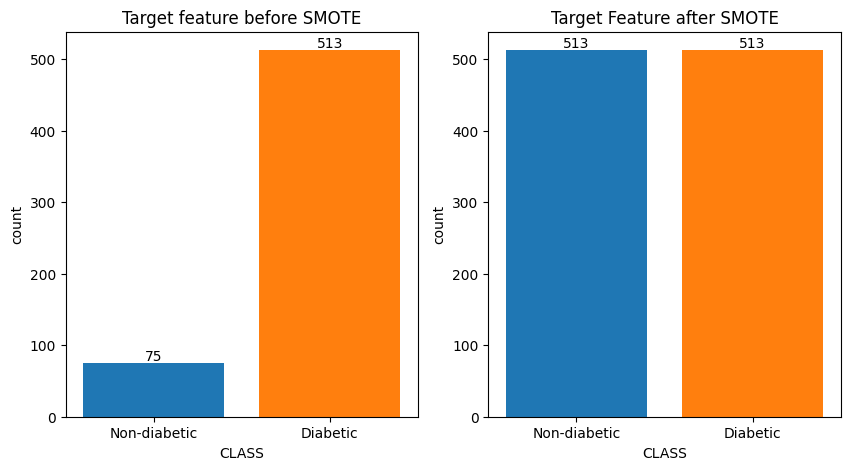

In [76]:
# visualizing the distribution of gender feature in the train set before and after SMOTE
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
sns.countplot(x='CLASS', data=pd.DataFrame(Y_train, columns=['CLASS']), saturation = 1, palette = "tab10", ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
ax[0].set_title('Target feature before SMOTE')
ax[0].set_xticklabels(['Non-diabetic', 'Diabetic'])

sns.countplot(x='CLASS', data=pd.DataFrame(Y_train_resampled, columns=['CLASS']), saturation = 1, palette = "tab10", ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].bar_label(ax[1].containers[1])
ax[1].set_title('Target Feature after SMOTE')
ax[1].set_xticklabels(['Non-diabetic', 'Diabetic'])

plt.show()

In [77]:
print(X_train_resampled.shape, X_test_scaled.shape, Y_train_resampled.shape, Y_test.shape)

(1026, 10) (147, 10) (1026,) (147,)


### K-Fold Cross-validation

In [78]:
# create the base line models
lg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

#create a list for all models
models = {'lg': lg, 'knn': knn, 'dt': dt}

#full model names
model_names = {'lg': 'Logistic Regression',
               'knn': 'K Neighbors Classifier',
               'dt': 'Decision Tree'
              }

# to compute performance metrics for all models
full_metrics = {model_names['lg']: [], model_names['knn']: [], model_names['dt']: []}

# Perform 10-fold cross-validation 10 times for each classifier but to save time, we run just 1 time
cv = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    cv_results = cross_val_score(model, X_train_resampled, Y_train_resampled, cv=cv)
    #print('Accuracy for {}: {}'.format(model_names[name], cv_results))
    #print()
    print('Average accuracy for {}: {}\n'.format(model_names[name], cv_results.mean()))

Average accuracy for Logistic Regression: 0.9561679040548258

Average accuracy for K Neighbors Classifier: 0.9678659813439939

Average accuracy for Decision Tree: 0.9853988197220636




### Hyperparameter Tuning

Here, we specify some parameters and perform an exhaustive search to find the best combination of hyperparameter values that yields the best model performance.


In [79]:
# Define the parameter grid for all classifiers
lg_param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'random_state': [42, None],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

knn_param_grid = {
    'n_neighbors': range(1, 10, 2), # odd values between 1 and 10
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3] #arbitrary p=3 for minkowski_distance
}

dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 4, 6],
    'random_state': [42, None]
}

#### Grid Search

The essence of this is to perform an exhaustive search to find the best combination of hyperparameters values that yeild the best model performance.


##### Logistic Regression

In [80]:
# Perform an exhaustive search on all specified hyperparameter values for the classifier
lg_grid_search = GridSearchCV(estimator=lg, param_grid=lg_param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
lg_grid_search.fit(X_train_resampled, Y_train_resampled)

# computing the best values
best_lg_params = lg_grid_search.best_params_
best_lg_model = lg_grid_search.best_estimator_
lg_score = lg_grid_search.best_score_
full_metrics[model_names['lg']].append(lg_score)

# Evaluate the best Logistic Regression model on test
Y_lg_pred = best_lg_model.predict(X_test_scaled)
test_lg_accuracy = metrics.accuracy_score(Y_test, Y_lg_pred)
full_metrics[model_names['lg']].append(test_lg_accuracy)

# display results
print('For Logistic Regression: ')
print('Best Hyperparameters: {}'.format(best_lg_params))
print('Training Accuracy: ', lg_score)
print('Test Accuracy: ', test_lg_accuracy)
print('Test Recall: ', metrics.recall_score(Y_test, Y_lg_pred))
print('Test Precision: ', metrics.precision_score(Y_test, Y_lg_pred))

For Logistic Regression: 
Best Hyperparameters: {'C': 100, 'penalty': None, 'random_state': 42, 'solver': 'sag'}
Training Accuracy:  0.9766324005330288
Test Accuracy:  0.9115646258503401
Test Recall:  0.9296875
Test Precision:  0.967479674796748


In [81]:
#classification report for the best logistic regression classifier
print('Classification Report for Logistic Regression')
print(metrics.classification_report(Y_test, Y_lg_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        19
           1       0.97      0.93      0.95       128

    accuracy                           0.91       147
   macro avg       0.80      0.86      0.82       147
weighted avg       0.92      0.91      0.92       147



Confusion Matrix Display for Logistic Regression
TN=15, FP=4, FN=9, TP=119


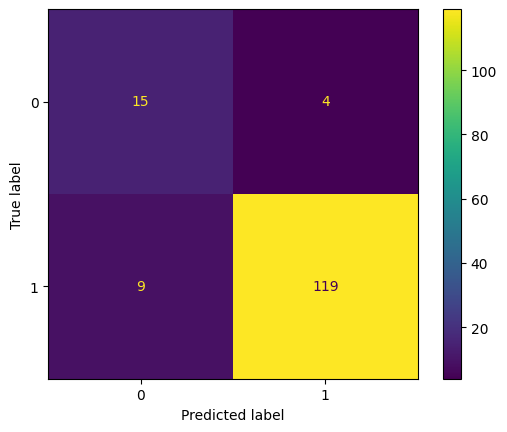

In [82]:
# confusion matrix for the best logistic regression classifier
print('Confusion Matrix Display for Logistic Regression')
cm = metrics.confusion_matrix(Y_test, Y_lg_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##### KNN

In [83]:
# Perform an exhaustive search on all specified hyperparameter values for the classifier
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
knn_grid_search.fit(X_train_resampled, Y_train_resampled)

# computing the best values
best_knn_params = knn_grid_search.best_params_
best_knn_model = knn_grid_search.best_estimator_
knn_score = knn_grid_search.best_score_
full_metrics[model_names['knn']].append(knn_score)

# Evaluate the best KNN model on test
Y_knn_pred = best_knn_model.predict(X_test_scaled)
test_knn_accuracy = metrics.accuracy_score(Y_test, Y_knn_pred)
full_metrics[model_names['knn']].append(test_knn_accuracy)

# display results
print('For K Neighbors Classifier: ')
print('Best Hyperparameters: {}'.format(best_knn_params))
print('Training Accuracy: ', knn_score)
print('Test Accuracy: ', test_knn_accuracy)
print('Test Recall: ', metrics.recall_score(Y_test, Y_knn_pred))
print('Test Precision: ', metrics.precision_score(Y_test, Y_knn_pred))

For K Neighbors Classifier: 
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Training Accuracy:  0.9785836664762992
Test Accuracy:  0.9183673469387755
Test Recall:  0.96875
Test Precision:  0.9393939393939394


In [84]:
#classification report for the best K Neighbors Classifier
print('Classification Report for K Neighbors Classifier')
print(metrics.classification_report(Y_test, Y_knn_pred))

Classification Report for K Neighbors Classifier
              precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.94      0.97      0.95       128

    accuracy                           0.92       147
   macro avg       0.84      0.77      0.80       147
weighted avg       0.91      0.92      0.91       147



Confusion Matrix Display for K Neighbors Classifier
TN=11, FP=8, FN=4, TP=124


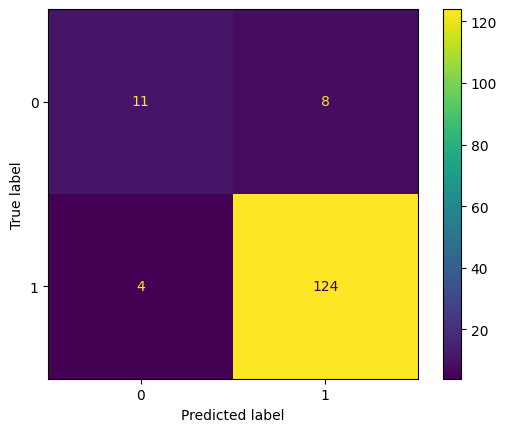

In [85]:
# confusion matrix for the best K Neighbors Classifier
print('Confusion Matrix Display for K Neighbors Classifier')
cm = metrics.confusion_matrix(Y_test, Y_knn_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##### Decision Tree

In [86]:
# Perform an exhaustive search on all specified hyperparameter values for the classifier
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train_resampled, Y_train_resampled)

# computing the best values
best_dt_params = dt_grid_search.best_params_
best_dt_model = dt_grid_search.best_estimator_
dt_score = dt_grid_search.best_score_
full_metrics[model_names['dt']].append(dt_score)

# Evaluate the best Decision Tree Classifier model on test
Y_dt_pred = best_dt_model.predict(X_test_scaled)
test_dt_accuracy = metrics.accuracy_score(Y_test, Y_dt_pred)
full_metrics[model_names['dt']].append(test_dt_accuracy)

# display results
print('For Decision Tree: ')
print('Best Hyperparameters: {}'.format(best_dt_params))
print('Training Accuracy: ', dt_score)
print('Test Accuracy: ', test_dt_accuracy)
print('Test Recall: ', metrics.recall_score(Y_test, Y_dt_pred))
print('Test Precision: ', metrics.precision_score(Y_test, Y_dt_pred))

For Decision Tree: 
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Training Accuracy:  0.9902722253950124
Test Accuracy:  0.9591836734693877
Test Recall:  0.984375
Test Precision:  0.9692307692307692


In [87]:
#classification report for the best Decision Tree Classifier
print('Classification Report for Decision Tree Classifier')
print(metrics.classification_report(Y_test, Y_dt_pred))

Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.97      0.98      0.98       128

    accuracy                           0.96       147
   macro avg       0.93      0.89      0.91       147
weighted avg       0.96      0.96      0.96       147



Confusion Matrix Display for Decision Tree Classifier
TN=15, FP=4, FN=2, TP=126


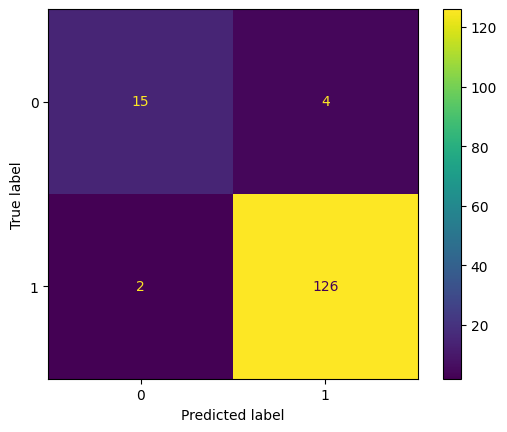

In [88]:
# confusion matrix for the best Decision Tree Classifier
print('Confusion Matrix Display for Decision Tree Classifier')
cm = metrics.confusion_matrix(Y_test, Y_dt_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [89]:
# Displaying all results for the tuned models
results = pd.DataFrame.from_dict(full_metrics, orient='index', columns=['Train Accuracy', 'Test Accuracy'])
results

,Train Accuracy,Test Accuracy
Logistic Regression,0.976632,0.911565
K Neighbors Classifier,0.978584,0.918367
Decision Tree,0.990272,0.959184


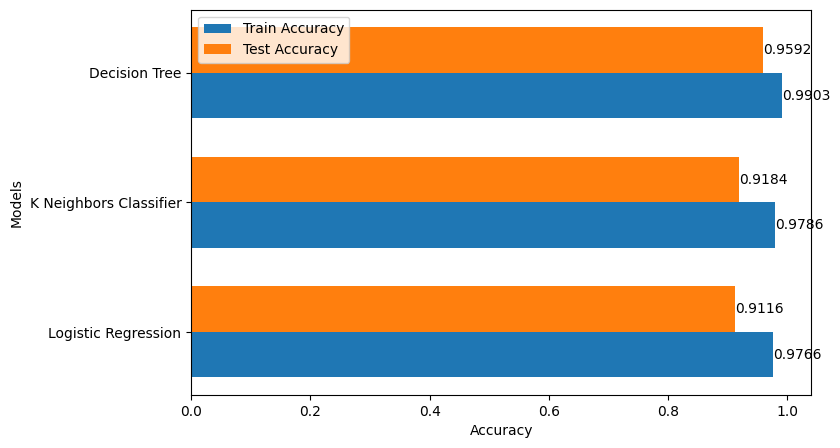

In [90]:
#visualize the performance of the final tuned model
# Extracting keys and values
keys = list(full_metrics.keys())
train_accuracy = [value[0] for value in full_metrics.values()]
test_accuracy = [value[1] for value in full_metrics.values()]

# Plotting
bar_width = 0.35
opacity = 1
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange color pair for train and test accuracy

fig, ax = plt.subplots(figsize=(8, 5))  # Larger figure size

for i, key in enumerate(keys):
    color_index = i % len(colors)
    plt.barh([i - bar_width/2, i + bar_width/2], [train_accuracy[i], test_accuracy[i]], 
             bar_width, alpha=opacity, color=colors, label=['Train Accuracy', 'Test Accuracy'])
    
    # Add value on each bar
    for j, value in enumerate([train_accuracy[i], test_accuracy[i]]):
        plt.text(value, i - bar_width/2 + j*bar_width, '{:.4f}'.format(value), ha='left', va='center')

# Adding labels and legend
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.yticks(range(len(keys)), keys)
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')

# Displaying the plot
plt.show()

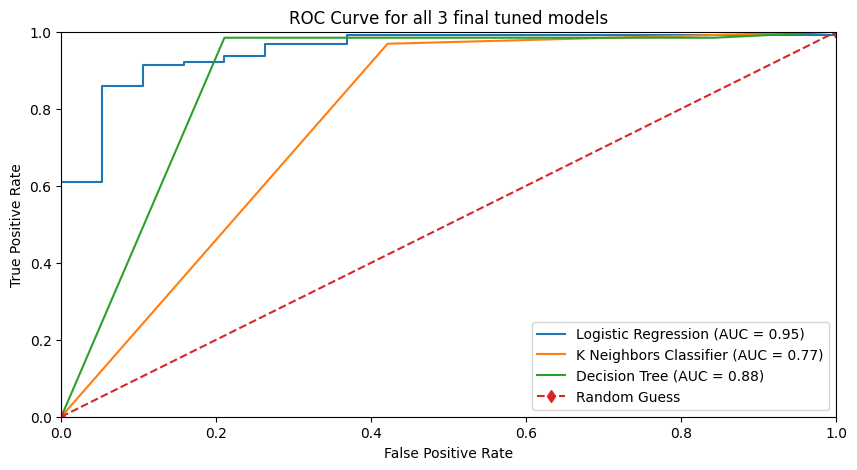

In [91]:
#ROC curve for the final tuned models
plt.figure(figsize=(10, 5))
best_models = [best_lg_model, best_knn_model, best_dt_model]
best_models_names = ['Logistic Regression', 'K Neighbors Classifier', 'Decision Tree']
for i, model in enumerate(best_models):
    Y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
    auc = metrics.roc_auc_score(Y_test, Y_pred_prob)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(best_models_names[i], auc))

plt.plot([0, 1], [0, 1], 'd--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all 3 final tuned models')
plt.legend()
plt.show()


## Model Explanation


### Feature Importance

#### Logistic Regression

  Feature  Importance
6     HDL    0.146947
0  Gender    0.258728
2    Urea    1.127455
8    VLDL    1.346312
3      Cr    5.255305
1     AGE    6.546867
7     LDL    9.044311
5      TG   12.538271
4    Chol   28.062841
9     BMI   30.573799


<Axes: title={'center': 'Feature importance for Logistic Regression'}, ylabel='Feature'>

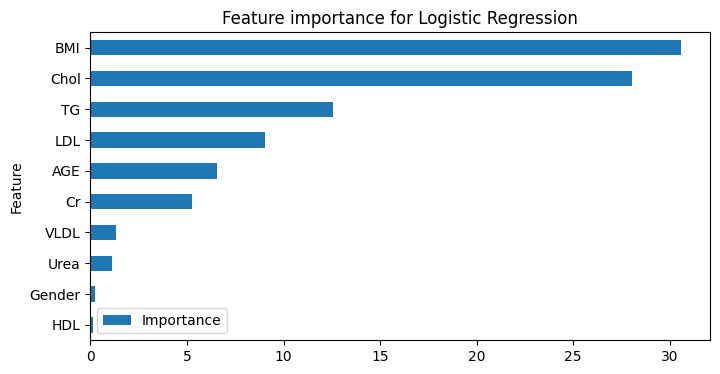

In [92]:
# feature importance for the final tuned Logistic Regression model
coefficients = best_lg_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 4), title='Feature importance for Logistic Regression')

#### Decision Tree

  Feature  Importance
0  Gender    0.000000
3      Cr    0.000000
7     LDL    0.000000
2    Urea    0.002946
1     AGE    0.003887
6     HDL    0.006977
8    VLDL    0.019797
5      TG    0.028983
4    Chol    0.062000
9     BMI    0.875408


<Axes: title={'center': 'Feature importance for Decision Tree'}, ylabel='Feature'>

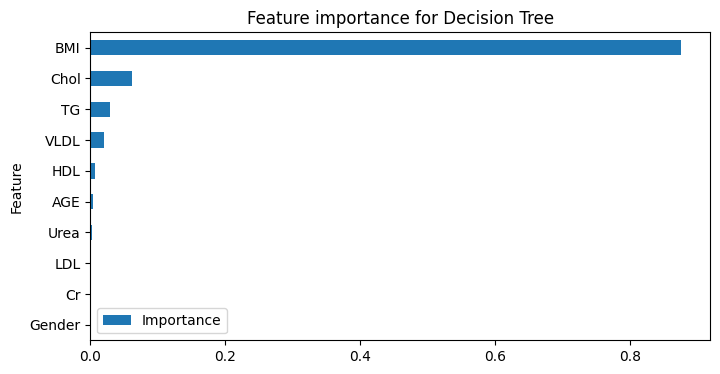

In [93]:
# feature importance on the BEST Decision Tree classifier
importance = best_dt_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 4), title='Feature importance for Decision Tree')


Both models have identified BMI (Body Mass Index) as a feature of importance. According to the BMI to CLASS distribution EDA, individuals classified as overweight or above are at a higher risk of diabetes, hence the reason for its importance. Perhaps the next step would be to train the models without the BMI Feature.


### SHAP

In [94]:
import shap

#converting scaled test data back to a DF with columns
test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Explaining KNN

In [95]:
# Produce the SHAP values
# Using shap.kmeans to summarize the background as K samples and speed up the run time
# with K=1, from the KNN best hyperparameter
knn_explainer = shap.KernelExplainer(best_knn_model.predict, shap.sample(test_df, 1))
knn_shap_values = knn_explainer.shap_values(test_df)

100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:11<00:00, 12.95it/s]


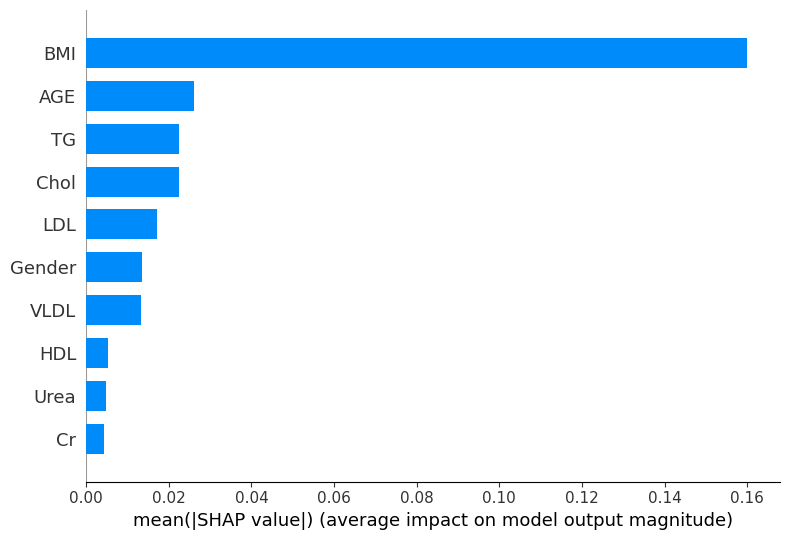

In [96]:
shap.summary_plot(knn_shap_values, test_df, plot_type="bar")

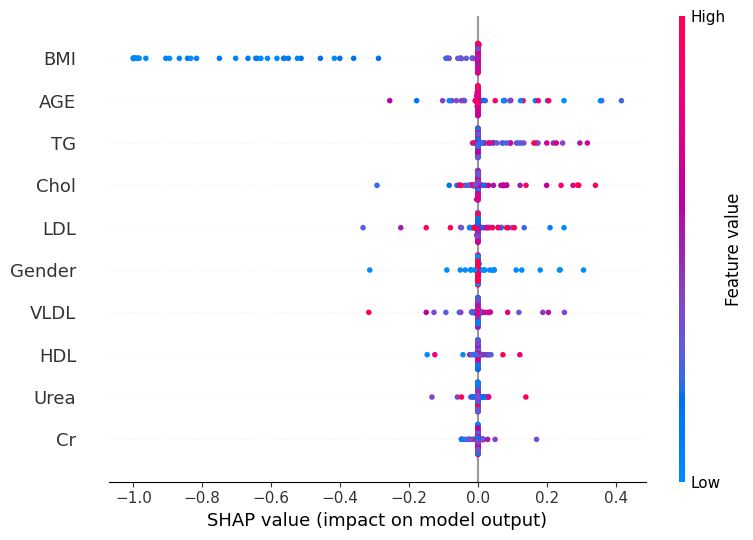

In [97]:
shap.summary_plot(knn_shap_values, test_df)

#### Explaining Decision Tree

In [98]:
# Produce the SHAP values
dt_explainer = shap.Explainer(best_dt_model.predict, test_df)
dt_shap_values = dt_explainer(test_df)

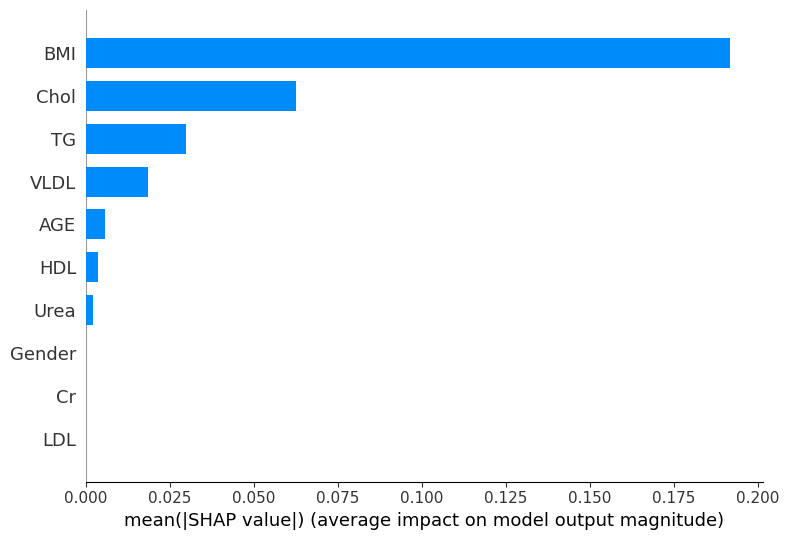

In [99]:
shap.summary_plot(dt_shap_values, test_df, plot_type="bar")

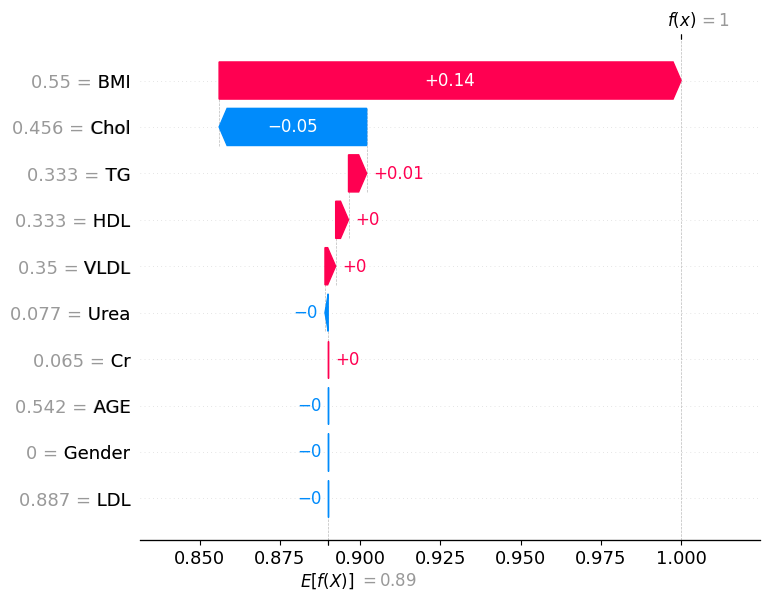

In [100]:
shap.plots.waterfall(dt_shap_values[0])

In [101]:
#shap.plots.beeswarm(dt_shap_values)

#### Explaining Logistic Regression

In [102]:
# Produce the SHAP values
lg_explainer = shap.Explainer(best_lg_model.predict, test_df)
lg_shap_values = lg_explainer(test_df)

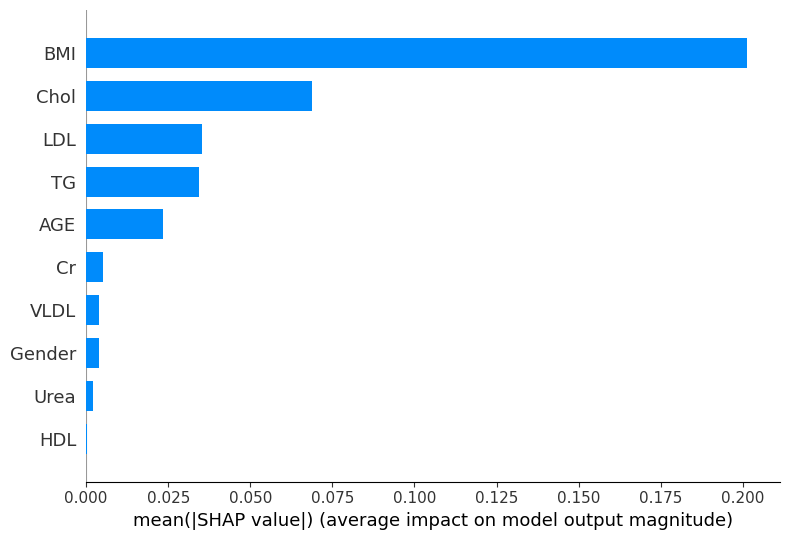

In [103]:
shap.summary_plot(lg_shap_values, test_df, plot_type="bar")

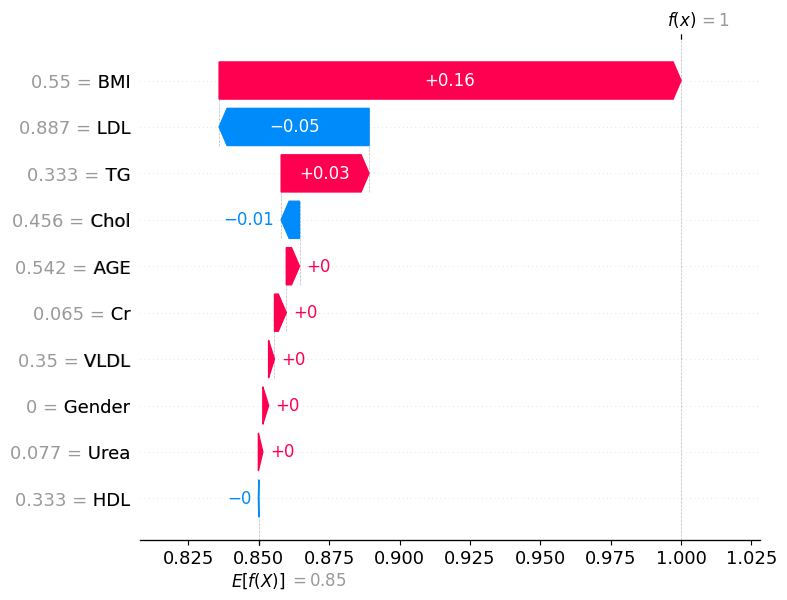

In [104]:
shap.plots.waterfall(lg_shap_values[0])

In [105]:
#shap.plots.beeswarm(lg_shap_values)

## Summary


Using SHAP further confirms that the BMI (Body Mass Index) is a feature of importance for all three models, while the HbA1c was dropped from the model development as it correlates with the target feature, such can't be done for the BMI feature as it represents just the size of a person, and in the real world, the fact that a person is overweight does not automatically mean they have diabetes but puts them at higher risk of diabetes.
